# Data Analysis On Netflix Dataset 

#### Importing Required Libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import datetime as dt
%matplotlib inline
from api_keys import omdb_api_key 
import requests
import plotly
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS


## Data Processing and Cleaning

In [81]:
csv_file = "data/netflix_titles.csv"
netflix_data_df = pd.read_csv(csv_file)
netflix_data_df.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [65]:
#renaming two columns (type and listed_in) 
netflix_data_df.rename(columns = {'type':'entertainment type', 'listed_in':'genre'}, inplace = True)
netflix_data_df

,show_id,entertainment type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [66]:
##searching for all null values within this dataset
#we are going to add values in null for country, rating, and date added

netflix_data_df.isnull().sum()

show_id                  0
entertainment type       0
title                    0
director              1969
cast                   570
country                476
date_added              11
release_year             0
rating                  10
duration                 0
genre                    0
description              0
dtype: int64

In [67]:
#counting the number of countries
country_count= netflix_data_df['country'].value_counts()
country_count


United States                                    2032
India                                             777
United Kingdom                                    348
Japan                                             176
Canada                                            141
                                                 ... 
India, Japan                                        1
Norway, Germany, Sweden                             1
United Kingdom, Canada, France, United States       1
United Arab Emirates, Jordan                        1
Cyprus, Austria, Thailand                           1
Name: country, Length: 554, dtype: int64

In [68]:
#replaced the null values with "united states"
netflix_data_df['country'].replace(np.nan, 'United States',inplace  = True)
netflix_data_df

,show_id,entertainment type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,United States,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [69]:
#checking to reconfirm no null values in country column
netflix_data_df.isnull().sum()

show_id                  0
entertainment type       0
title                    0
director              1969
cast                   570
country                  0
date_added              11
release_year             0
rating                  10
duration                 0
genre                    0
description              0
dtype: int64

In [70]:
#counting the highest rating based on the number of movies which is TV-MA and we will use this rating to fill any null values
#in rating column
rating_count= netflix_data_df['rating'].value_counts()
rating_count

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [9]:
#filling null values in rating with TV-MA
netflix_data_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
netflix_data_df

,show_id,entertainment type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,United States,NaN,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [10]:
#replaced the null values in date_added column with "1/1/2020"
netflix_data_df["date_added"] = netflix_data_df["date_added"].fillna("1/1/2020")
netflix_data_df

,show_id,entertainment type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,1/1/2020,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,1/1/2020,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,United States,1/1/2020,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,1/1/2020,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [11]:
#reconfirming the date_added has no null values
netflix_data_df.isnull().sum()

show_id                  0
entertainment type       0
title                    0
director              1969
cast                   570
country                  0
date_added               0
release_year             0
rating                   0
duration                 0
genre                    0
description              0
dtype: int64

In [12]:
#creating a new column for date_added and keeping the format to years only
netflix_data_df["date_added"] = netflix_data_df["date_added"].str.strip()
netflix_data_df['year_added']=pd.DatetimeIndex(netflix_data_df['date_added']).year


netflix_data_df

,show_id,entertainment type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,1/1/2020,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",2020
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,1/1/2020,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",2020
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,United States,1/1/2020,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...,2020
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,1/1/2020,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2020


In [13]:
netflix_data_df = netflix_data_df.drop(netflix_data_df.columns[[3, 4, 6, 11]], axis=1)
netflix_data_df

#removed director, cast, date_added, and description (uneccessary and too many null values)

,show_id,entertainment type,title,country,release_year,rating,duration,genre,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",2019
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,2016
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,2018
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,2018
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,2017
...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",2020
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies,2020
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,2016,TV-MA,60 min,Movies,2020
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas",2020


In [14]:
netflix_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   show_id             6234 non-null   int64 
 1   entertainment type  6234 non-null   object
 2   title               6234 non-null   object
 3   country             6234 non-null   object
 4   release_year        6234 non-null   int64 
 5   rating              6234 non-null   object
 6   duration            6234 non-null   object
 7   genre               6234 non-null   object
 8   year_added          6234 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 438.5+ KB


In [15]:
netflix_data_df["imdb_rating"] = ''

In [16]:
endpoint = "http://www.omdbapi.com/?"
endpoint = f"{endpoint}apikey={omdb_api_key}"
print(endpoint)

http://www.omdbapi.com/?apikey=db86ac2f


In [17]:
#url = "http://www.omdbapi.com/?apikey=omdb_api_key&t=Norm%20of%20the%20North:%20King%20Sized%20Adventure&y=2019"

title = "Norm%20of%20the%20North:%20King%20Sized%20Adventure"
year = "2019"
url = f"{endpoint}&t={title}&y={year}"
print(url)
res = requests.get(url)
print(res.json())

http://www.omdbapi.com/?apikey=db86ac2f&t=Norm%20of%20the%20North:%20King%20Sized%20Adventure&y=2019
{'Title': 'Norm of the North: King Sized Adventure', 'Year': '2019', 'Rated': 'Not Rated', 'Released': '02 Aug 2019', 'Runtime': '90 min', 'Genre': 'Animation, Adventure, Comedy', 'Director': 'Richard Finn, Tim Maltby', 'Writer': 'Dean Stefan, Daniel Altiere, Steven Altiere', 'Actors': 'Alan Marriott, Andrew Toth, Brian Dobson', 'Plot': 'An ancient Chinese artifact has been stolen by a villainous archaeologist named Dexter. With the help of his Lemming friends, Norm must keep his word and embark on a journey across the world to help recover the artifact for the pe...', 'Language': 'English', 'Country': 'United States, India, South Korea, China', 'Awards': 'N/A', 'Poster': 'https://m.media-amazon.com/images/M/MV5BNjMwZDhhZWYtOTM0OC00ZTQzLWIyNDktNDM1NmVkYTY4NWNlXkEyXkFqcGdeQXVyNTYyNDUxMDc@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '3.3/10'}], 'Metascore': 

In [18]:

for index, row in netflix_data_df.iterrows():
    print(row['title'], row['release_year'], row['imdb_rating'])
    title = row['title']
    year = row['release_year']
    url = f"{endpoint}&t={title}&y={year}"
    print(url)
    try:
        res = requests.get(url).json()
        imdb_rating = res['imdbRating']
        netflix_data_df['imdb_rating'][index] = imdb_rating
    except:
        imdb_rating = np.nan
        netflix_data_df['imdb_rating'][index] = imdb_rating
    print(imdb_rating)
    


Norm of the North: King Sized Adventure 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Norm of the North: King Sized Adventure&y=2019
3.3
Jandino: Whatever it Takes 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jandino: Whatever it Takes&y=2016
4.6
Transformers Prime 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Transformers Prime&y=2013


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10852\4030734281.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data_df['imdb_rating'][index] = imdb_rating


7.4
Transformers: Robots in Disguise 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Transformers: Robots in Disguise&y=2016
nan
#realityhigh 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=#realityhigh&y=2017


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10852\4030734281.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data_df['imdb_rating'][index] = imdb_rating


nan
Apaches 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Apaches&y=2016
nan
Automata 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Automata&y=2014
6.0
Fabrizio Copano: Solo pienso en mi 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fabrizio Copano: Solo pienso en mi&y=2017
4.8
Fire Chasers 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fire Chasers&y=2017
6.6
Good People 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Good People&y=2014
5.5
Joaquín Reyes: Una y no más 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Joaquín Reyes: Una y no más&y=2017
N/A
Kidnapping Mr. Heineken 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kidnapping Mr. Heineken&y=2015
6.1
Krish Trish and Baltiboy 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Krish Trish and Baltiboy&y=2009
nan
Krish Trish and Baltiboy: Battle of Wits 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Krish Trish and Baltiboy: Battle of Wits&y=2013
nan
Krish Trish and Baltiboy: Best Friends Forever 2016 
http://www.omdbapi.com

5.6
Lessons from a School Shooting: Notes from Dunblane 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Lessons from a School Shooting: Notes from Dunblane&y=2018
nan
Made in Mexico 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Made in Mexico&y=2018
3.9
Single 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Single&y=2015
6.7
The 3rd Eye 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The 3rd Eye&y=2018
N/A
The Sinking Of Van Der Wijck 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Sinking Of Van Der Wijck&y=2013
7.6
Two Catalonias 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Two Catalonias&y=2018
6.4
Bobby Sands: 66 Days 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bobby Sands: 66 Days&y=2016
7.2
Bard of Blood 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bard of Blood&y=2019
6.8
Deliha 2 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Deliha 2&y=2018
4.7
Dragons: Rescue Riders 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dragons: Rescue Riders&y=2019
6.1
In the Shado

7.7
The Endless 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Endless&y=2017
6.5
Transformers: Rescue Bots 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Transformers: Rescue Bots&y=2016
nan
Jerry Before Seinfeld 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jerry Before Seinfeld&y=2017
7.0
Manhunt 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Manhunt&y=2017
8.1
Karol Modzelewski, Łukasz „Lotek” Lodkowski No Offense 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Karol Modzelewski, Łukasz „Lotek” Lodkowski No Offense&y=2016
nan
Katarzyna Piasecka, Rafał Pacześ Seriously Funny 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Katarzyna Piasecka, Rafał Pacześ Seriously Funny&y=2016
nan
Mariusz Kałamaga, Karol Kopiec, Wiolka Walaszczyk Hilarious Trio 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mariusz Kałamaga, Karol Kopiec, Wiolka Walaszczyk Hilarious Trio&y=2016
nan
Rafał Banaś, Michał Leja Laugh out Loud 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rafał Banaś, Michał L

8.4
Norm Macdonald Has a Show 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Norm Macdonald Has a Show&y=2018
8.5
Still 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Still&y=2010
4.3
Super Monsters Monster Party 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Super Monsters Monster Party&y=2018
nan
The Angel 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Angel&y=2018
6.6
The Land of Steady Habits 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Land of Steady Habits&y=2018
6.2
The Rise of Phoenixes 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Rise of Phoenixes&y=2018
8.4
American Warfighter 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=American Warfighter&y=2019
nan
Deviant Love 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Deviant Love&y=2019
3.5
Head Count 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Head Count&y=2018
5.4
Hello, Privilege. It's Me, Chelsea 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hello, Privilege. It's Me, Chelsea&y=2019
4.8
Kabaneri o

6.3
The Perfect Day 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Perfect Day&y=2018
N/A
The Promise 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Promise&y=2017
5.9
The River Wild 1994 
http://www.omdbapi.com/?apikey=db86ac2f&t=The River Wild&y=1994
6.5
The Road to Calvary 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Road to Calvary&y=2017
7.7
최강전사 미니특공대 : 영웅의 탄생 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=최강전사 미니특공대 : 영웅의 탄생&y=2018
nan
A Boy Name Flora A 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Boy Name Flora A&y=2017
nan
A House of Blocks 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=A House of Blocks&y=2017
nan
Aakhri Adaalat 1988 
http://www.omdbapi.com/?apikey=db86ac2f&t=Aakhri Adaalat&y=1988
5.4
Alias JJ, la celebridad del mal 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Alias JJ, la celebridad del mal&y=2017
nan
All About Love 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=All About Love&y=2017
3.9
Berserk: The Golden Age Arc II - The Battl

6.7
The Water Diviner 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Water Diviner&y=2014
7.0
Chris Brown: Welcome to My Life 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chris Brown: Welcome to My Life&y=2017
5.6
13TH 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=13TH&y=2016
8.2
Russell Peters: Almost Famous 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Russell Peters: Almost Famous&y=2016
6.6
StoryBots Super Songs 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=StoryBots Super Songs&y=2016
8.8
The Siege of Jadotville 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Siege of Jadotville&y=2016
7.2
Love for Sale 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Love for Sale&y=2018
7.4
Jackpot 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jackpot&y=2015
6.7
Seven in Heaven 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Seven in Heaven&y=2018
5.3
ID-0 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=ID-0&y=2017
6.1
Kung Fu Yoga 2017 
http://www.omdbapi.com/?apikey=db86ac2f

nan
Manson Family Vacation 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Manson Family Vacation&y=2015
5.8
A Little Thing Called First Love 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Little Thing Called First Love&y=2019
7.9
The Last Whistle 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Last Whistle&y=2019
5.0
Been So Long 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Been So Long&y=2018
5.5
Dovlatov 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dovlatov&y=2018
6.4
Incoming 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Incoming&y=2019
N/A
Jefe 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jefe&y=2018
5.5
Santo Cachón 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Santo Cachón&y=2018
4.6
Shirkers 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Shirkers&y=2018
7.4
Terrorism Close Calls 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Terrorism Close Calls&y=2018
5.3
W/O Ram 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=W/O Ram&y=2018
6.0
Strange Weather 2016 
htt

6.9
Ready to Mingle 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ready to Mingle&y=2019
5.9
Salam - The First ****** Nobel Laureate 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Salam - The First ****** Nobel Laureate&y=2018
7.8
Death Race: Beyond Anarchy 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Death Race: Beyond Anarchy&y=2017
nan
Eric ldle's What About Dick? 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Eric ldle's What About Dick?&y=2012
nan
Joe Rogan: Strange Times 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Joe Rogan: Strange Times&y=2018
7.3
Monty Python Best Bits (mostly) 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Monty Python Best Bits (mostly)&y=2014
nan
Monty Python Conquers America 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Monty Python Conquers America&y=2008
nan
Monty Python Live (Mostly): One Down, Five to Go 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Monty Python Live (Mostly): One Down, Five to Go&y=2014
nan
Monty Python: Before the Fly

7.7
Circle 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Circle&y=2015
6.0
Black Money Love 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Black Money Love&y=2014
7.5
Dark Crimes 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dark Crimes&y=2016
4.7
Homeland 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Homeland&y=2019
N/A
Magical Andes 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Magical Andes&y=2019
nan
Power Rangers Beast Morphers 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Power Rangers Beast Morphers&y=2019
6.6
Devlok with Devdutt Pattanaik 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Devlok with Devdutt Pattanaik&y=2017
nan
Meghnadbodh Rohoshyo 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Meghnadbodh Rohoshyo&y=2017
6.3
Sanju 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sanju&y=2018
7.6
Stunt Science 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Stunt Science&y=2018
5.0
A Scandall 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Scandall&y=2016
3.1
Aisa Ye

nan
Beyblade Burst Turbo 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Beyblade Burst Turbo&y=2018
nan
GEN HOSHINO STADIUM TOUR “POP VIRUS” 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=GEN HOSHINO STADIUM TOUR “POP VIRUS”&y=2019
nan
Ultramarine Magmell 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ultramarine Magmell&y=2019
nan
22-Jul 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=22-Jul&y=2018
nan
Blood Pact 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Blood Pact&y=2018
nan
Tales From the Hood 2 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tales From the Hood 2&y=2018
4.4
Christina P: Mother Inferior 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Christina P: Mother Inferior&y=2017
6.4
Nature's Great Events (2009) 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Nature's Great Events (2009)&y=2009
nan
The Blue Planet: A Natural History of the Oceans 2001 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Blue Planet: A Natural History of the Oceans&y=2001
nan
Chelsea Handler

7.7
Delhi 6 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Delhi 6&y=2009
6.1
Dev.D 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dev.D&y=2009
7.9
Dil Vil Pyaar Vyaar 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dil Vil Pyaar Vyaar&y=2014
6.5
Dushman 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dushman&y=2017
5.4
Earth's Natural Wonders: Life at the Extremes 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Earth's Natural Wonders: Life at the Extremes&y=2018
nan
Ek Main Aur Ekk Tu 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ek Main Aur Ekk Tu&y=2012
5.8
Fishtail 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fishtail&y=2015
nan
Freedom at Midnight 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Freedom at Midnight&y=2018
nan
Haani 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Haani&y=2013
7.7
Happy Go Lucky 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Happy Go Lucky&y=2014
6.6
Harishchandrachi Factory 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Harishchandrachi Fa

4.2
Ice Guardians 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ice Guardians&y=2016
7.4
Justice in the City 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Justice in the City&y=2012
nan
Kahlil Gibran's The Prophet 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kahlil Gibran's The Prophet&y=2014
7.0
Miss Hokusai 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Miss Hokusai&y=2015
6.7
Monster High: Great Scarrier Reef 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Monster High: Great Scarrier Reef&y=2016
6.2
Monster High: New Ghoul at School 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Monster High: New Ghoul at School&y=2010
6.8
My Life as a Zucchini 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=My Life as a Zucchini&y=2016
7.7
Nature's Great Race 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Nature's Great Race&y=2016
nan
Phantom Boy 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Phantom Boy&y=2015
6.6
PJ Masks 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=PJ Masks&y=201

nan
SCAMS 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=SCAMS&y=2019
nan
Shadow 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Shadow&y=2018
nan
Let It Fall: Los Angeles 1982-1992 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Let It Fall: Los Angeles 1982-1992&y=2017
nan
Luccas Neto in: Summer Camp 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Luccas Neto in: Summer Camp&y=2019
nan
Seth Meyers: Lobby Baby 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Seth Meyers: Lobby Baby&y=2019
nan
The Lovers 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Lovers&y=2017
nan
Tune in for Love 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tune in for Love&y=2019
nan
Undercover Brother 2 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Undercover Brother 2&y=2019
nan
Voice 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Voice&y=2019
nan
Bucket List 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bucket List&y=2018
nan
John Leguizamo's Latin History for Morons 2018 
http://www.omdbapi.com/?

nan
Beauties of the Night 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Beauties of the Night&y=2016
nan
Gilmore Girls: A Year in the Life 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gilmore Girls: A Year in the Life&y=2016
nan
Michael Che Matters 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Michael Che Matters&y=2016
nan
Awake 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Awake&y=2019
nan
Popeye 1980 
http://www.omdbapi.com/?apikey=db86ac2f&t=Popeye&y=1980
nan
Shot Caller 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Shot Caller&y=2017
nan
Strong Girl Bong-soon 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Strong Girl Bong-soon&y=2017
nan
Bushwick 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bushwick&y=2017
nan
Cuba and the Cameraman 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Cuba and the Cameraman&y=2017
nan
The Girl from the Song 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Girl from the Song&y=2016
nan
The Many Faces of Ito 2017 
http://www.omdbapi.com

nan
Target 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Target&y=2018
nan
The Final Table 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Final Table&y=2018
nan
Trevor Noah: Son of Patricia 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Trevor Noah: Son of Patricia&y=2018
nan
100 Things to do Before High School 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=100 Things to do Before High School&y=2014
nan
A Fairly Odd Summer 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Fairly Odd Summer&y=2014
nan
Bella and the Bulldogs 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bella and the Bulldogs&y=2015
nan
Big Time Movie 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Big Time Movie&y=2012
nan
Don't Be Afraid of the Dark 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Don't Be Afraid of the Dark&y=2010
nan
Escape from Mr. Lemoncello’s Library 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Escape from Mr. Lemoncello’s Library&y=2017
nan
Hey Arnold! The Jungle Movie 2017 
http://w

nan
Halkaa 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Halkaa&y=2018
nan
Mala Kahich Problem Nahi 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mala Kahich Problem Nahi&y=2017
nan
May the Devil Take You 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=May the Devil Take You&y=2018
nan
Muzaffarnagar Baaqi Hai 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Muzaffarnagar Baaqi Hai&y=2015
nan
Odu Raja Odu 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Odu Raja Odu&y=2018
nan
Only the Dead 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Only the Dead&y=2015
nan
Pimpal 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pimpal&y=2017
nan
Savita Damodar Paranjpe 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Savita Damodar Paranjpe&y=2018
nan
Shopkins: Chef Club 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Shopkins: Chef Club&y=2016
nan
Shopkins: Wild 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Shopkins: Wild&y=2018
nan
Shopkins: World Vacation 2017 
http://www.omdbapi.com/?apikey=

nan
Gigi 1958 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gigi&y=1958
nan
Gosford Park 2001 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gosford Park&y=2001
nan
Gothika 2003 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gothika&y=2003
nan
Grease 1978 
http://www.omdbapi.com/?apikey=db86ac2f&t=Grease&y=1978
nan
Hache 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hache&y=2019
nan
Harlem Globetrotters: The Team That Changed the World 2005 
http://www.omdbapi.com/?apikey=db86ac2f&t=Harlem Globetrotters: The Team That Changed the World&y=2005
nan
Hello Ninja 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hello Ninja&y=2019
nan
Holiday in the Wild 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Holiday in the Wild&y=2019
nan
Holly Star 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Holly Star&y=2018
nan
How to Be a Latin Lover 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=How to Be a Latin Lover&y=2017
nan
How to Be a Player 1997 
http://www.omdbapi.com/?apikey=db86ac2f&t=How to Be a Player&

nan
Gaddar: the Traitor 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gaddar: the Traitor&y=2015
nan
Get Shorty 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Get Shorty&y=2017
nan
Ghanchakkar 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ghanchakkar&y=2013
nan
Girl from Nowhere 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Girl from Nowhere&y=2018
nan
Grandmaster 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Grandmaster&y=2012
nan
Hattrick 2007 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hattrick&y=2007
nan
Heroine 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Heroine&y=2012
nan
Himmatwala 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Himmatwala&y=2013
nan
Husbands in Goa 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Husbands in Goa&y=2012
nan
Jatts in Golmaal 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jatts in Golmaal&y=2013
nan
Kai Po Che! 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kai Po Che!&y=2013
nan
Kalakalappu 2012 
http://www.omdbapi.com/?apikey=db86ac

nan
Bathtubs Over Broadway 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bathtubs Over Broadway&y=2018
nan
Gatao 2: Rise of the King 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gatao 2: Rise of the King&y=2018
nan
Insidious 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Insidious&y=2010
nan
Lion's Heart 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Lion's Heart&y=2013
nan
Regatta 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Regatta&y=2015
nan
Tattah 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tattah&y=2013
nan
The Bulbul's Nest 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Bulbul's Nest&y=2013
nan
Norm Macdonald: Hitler's Dog, Gossip & Trickery 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Norm Macdonald: Hitler's Dog, Gossip & Trickery&y=2017
nan
Away From Home 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Away From Home&y=2015
nan
Bibik-Bibikku 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bibik-Bibikku&y=2016
nan
Cinta 100KG 2016 
http://www.omdbapi.com/?

nan
Si saben cómo me pongo ¿pá qué me invitan? 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Si saben cómo me pongo ¿pá qué me invitan?&y=2018
nan
Forever Pure 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Forever Pure&y=2016
nan
Rangoon 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rangoon&y=2017
nan
Hot Girls Wanted 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hot Girls Wanted&y=2015
nan
Lifechanger 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Lifechanger&y=2018
nan
The Nutcracker and the Four Realms 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Nutcracker and the Four Realms&y=2018
nan
After Porn Ends 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=After Porn Ends&y=2012
nan
Charmed 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Charmed&y=2019
nan
Historical Roasts 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Historical Roasts&y=2019
nan
The Break with Michelle Wolf 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Break with Michelle Wolf&y=2018
nan
The Do-O

nan
It's Bruno! 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=It's Bruno!&y=2019
nan
Maria 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Maria&y=2019
nan
ReMastered: The Lion's Share 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=ReMastered: The Lion's Share&y=2019
nan
Saverio Raimondo: Il Satiro Parlante 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Saverio Raimondo: Il Satiro Parlante&y=2019
nan
See You Yesterday 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=See You Yesterday&y=2019
nan
Well-Intended Love 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Well-Intended Love&y=2019
nan
Katt Williams: American Hustle (The Movie) 2007 
http://www.omdbapi.com/?apikey=db86ac2f&t=Katt Williams: American Hustle (The Movie)&y=2007
nan
Tinker Bell and the Legend of the NeverBeast 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tinker Bell and the Legend of the NeverBeast&y=2014
nan
Even the Rain 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Even the Rain&y=2010
nan
Good Sam 2019 
http

nan
Chhota Bheem Ka Romani Adventure 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chhota Bheem Ka Romani Adventure&y=2018
nan
Chhota Bheem Ka Troll Se Takkar 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chhota Bheem Ka Troll Se Takkar&y=2018
nan
In Family I Trust 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=In Family I Trust&y=2018
nan
Jailbirds 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jailbirds&y=2019
nan
Pose 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pose&y=2018
nan
The Princess Weiyoung 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Princess Weiyoung&y=2016
nan
The Society 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Society&y=2019
nan
Wine Country 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Wine Country&y=2019
nan
Aiyyaa 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Aiyyaa&y=2012
nan
Bbuddah Hoga Terra Baap 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bbuddah Hoga Terra Baap&y=2011
nan
Gabbar Is Back 2015 
http://www.omdbapi.com/?apikey=db

nan
Don't Think Twice 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Don't Think Twice&y=2016
nan
Drishyam 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Drishyam&y=2015
nan
English Babu Desi Mem 1996 
http://www.omdbapi.com/?apikey=db86ac2f&t=English Babu Desi Mem&y=1996
nan
Fire in the Blood 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fire in the Blood&y=2012
nan
Gollu Aur Pappu 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gollu Aur Pappu&y=2014
nan
HALO Legends 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=HALO Legends&y=2009
nan
Harry Benson: Shoot First 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Harry Benson: Shoot First&y=2016
nan
He Even Has Your Eyes 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=He Even Has Your Eyes&y=2016
nan
In the Shadow of Iris 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=In the Shadow of Iris&y=2016
nan
Inkaar 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Inkaar&y=2013
nan
Japanese Style Originator 2008 
http://www.omdbapi.com/?apik

nan
A Korean Odyssey 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Korean Odyssey&y=2017
nan
Bedtime Stories 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bedtime Stories&y=2008
nan
Caregiver 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Caregiver&y=2008
nan
Christopher Robin 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Christopher Robin&y=2018
nan
The Hard Way 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Hard Way&y=2019
nan
F the Prom 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=F the Prom&y=2017
nan
Everyday I Love You 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Everyday I Love You&y=2015
nan
I Am 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=I Am&y=2010
nan
Kid Kulafu 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kid Kulafu&y=2015
nan
My Only Mother 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=My Only Mother&y=2013
nan
No Other Woman 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=No Other Woman&y=2011
nan
The Dawn Wall 2017 
http://www.omdbapi.com/?a

nan
Verses of Love 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Verses of Love&y=2008
nan
Ég man þig 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ég man þig&y=2017
nan
James Acaster: Repertoire 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=James Acaster: Repertoire&y=2018
nan
Blood Money 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Blood Money&y=2012
nan
Nate Bargatze: The Tennessee Kid 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Nate Bargatze: The Tennessee Kid&y=2019
nan
Birdshot 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Birdshot&y=2016
nan
Sei 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sei&y=2018
nan
The Eagle of El-Se'eed 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Eagle of El-Se'eed&y=2018
nan
Kung Fu Panda: Secrets of the Scroll 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kung Fu Panda: Secrets of the Scroll&y=2016
nan
Superlopez 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Superlopez&y=2018
nan
Monster High: Haunted 2015 
http://www.omdba

nan
Jimmy Carr: Funny Business 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jimmy Carr: Funny Business&y=2016
nan
My Beautiful Broken Brain 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=My Beautiful Broken Brain&y=2016
nan
Pee-wee's Big Holiday 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pee-wee's Big Holiday&y=2016
nan
5 Flights Up 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=5 Flights Up&y=2014
nan
Green Door 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Green Door&y=2019
nan
Deidra & Laney Rob a Train 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Deidra & Laney Rob a Train&y=2017
nan
Julie's Greenroom 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Julie's Greenroom&y=2017
nan
Naledi: A Baby Elephant's Tale 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Naledi: A Baby Elephant's Tale&y=2016
nan
Pandora 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pandora&y=2016
nan
Samurai Gourmet 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Samurai Gourmet&y=2017
nan
A Separa

nan
Cheer Squad 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Cheer Squad&y=2016
nan
Jim Norton: Mouthful of Shame 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jim Norton: Mouthful of Shame&y=2017
nan
Ken Burns: The West 1996 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ken Burns: The West&y=1996
nan
More to Say 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=More to Say&y=2018
nan
The Land of Hypocrisy 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Land of Hypocrisy&y=2018
nan
Triple Frontier 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Triple Frontier&y=2019
nan
Children of the Whales 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Children of the Whales&y=2017
nan
Ricky Gervais: Humanity 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ricky Gervais: Humanity&y=2018
nan
Stretch Armstrong: The Breakout 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Stretch Armstrong: The Breakout&y=2018
nan
A Man Called God 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Man Called God&y

nan
Wet Hot American Summer 2001 
http://www.omdbapi.com/?apikey=db86ac2f&t=Wet Hot American Summer&y=2001
nan
Winter's Bone 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Winter's Bone&y=2010
nan
Your Son 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Your Son&y=2018
nan
21 Thunder 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=21 Thunder&y=2017
nan
2307: Winter's Dream 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=2307: Winter's Dream&y=2016
nan
Adel Karam: Live from Beirut 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Adel Karam: Live from Beirut&y=2018
nan
Ai Weiwei: Never Sorry 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ai Weiwei: Never Sorry&y=2012
nan
Aitraaz 2004 
http://www.omdbapi.com/?apikey=db86ac2f&t=Aitraaz&y=2004
nan
Bachelor Girls 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bachelor Girls&y=2016
nan
Balu Mahi 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Balu Mahi&y=2017
nan
Battle Drone 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Battle Drone&y=20

nan
NATURE: Natural Born Hustlers 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=NATURE: Natural Born Hustlers&y=2016
nan
Nature: Raising the Dinosaur Giant 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Nature: Raising the Dinosaur Giant&y=2016
nan
Nila 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Nila&y=2016
nan
Revelations 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Revelations&y=2016
nan
Servant of the People 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Servant of the People&y=2015
nan
SuperNature: Wild Flyers 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=SuperNature: Wild Flyers&y=2016
nan
Sustainable 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sustainable&y=2016
nan
Tiger 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tiger&y=2016
6.4
Tong: Memories 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tong: Memories&y=2016
nan
Ugly 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ugly&y=2013
nan
Vikings Unearthed 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Viking

nan
Churchill’s Secret Agents: The New Recruits 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Churchill’s Secret Agents: The New Recruits&y=2018
nan
Jani Dueñas: Grandes fracasos de ayer y hoy 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jani Dueñas: Grandes fracasos de ayer y hoy&y=2018
nan
Kiss Me First 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kiss Me First&y=2018
nan
Los 10 años de Peter Capusotto 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Los 10 años de Peter Capusotto&y=2015
nan
Penalty Kick 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Penalty Kick&y=2018
nan
Recovery Boys 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Recovery Boys&y=2018
nan
TAU 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=TAU&y=2018
nan
The Forest 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Forest&y=2017
nan
Ralphie May: Imperfectly Yours 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ralphie May: Imperfectly Yours&y=2015
nan
20th Century Women 2016 
http://www.omdbapi.com/?apik

nan
Unruly Friends 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Unruly Friends&y=2011
nan
The Vietnam War: A Film by Ken Burns and Lynn Novick 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Vietnam War: A Film by Ken Burns and Lynn Novick&y=2017
nan
Amar Akbar & Tony 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Amar Akbar & Tony&y=2015
nan
Puss in Book: Trapped in an Epic Tale 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Puss in Book: Trapped in an Epic Tale&y=2017
nan
Rory Scovel Tries Stand-Up for the First Time 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rory Scovel Tries Stand-Up for the First Time&y=2017
nan
Life Story 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Life Story&y=2014
nan
Arthdal Chronicles 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Arthdal Chronicles&y=2019
nan
Good Night, and Good Luck 2005 
http://www.omdbapi.com/?apikey=db86ac2f&t=Good Night, and Good Luck&y=2005
nan
Krutant 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Krutant&y=2019
n

nan
Dragonheart: Battle for the Heartfire 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dragonheart: Battle for the Heartfire&y=2017
nan
Oh, Hello On Broadway 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Oh, Hello On Broadway&y=2017
nan
Reincarnated 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Reincarnated&y=2012
nan
Jo Koy: Comin' In Hot 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jo Koy: Comin' In Hot&y=2019
nan
Rolling Thunder Revue: A Bob Dylan Story by Martin Scorsese 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rolling Thunder Revue: A Bob Dylan Story by Martin Scorsese&y=2019
nan
A new Capitalism 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=A new Capitalism&y=2017
nan
My Daddy is in Heaven 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=My Daddy is in Heaven&y=2017
nan
Ralph Breaks the Internet: Wreck-It Ralph 2 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ralph Breaks the Internet: Wreck-It Ralph 2&y=2018
nan
Upin & Ipin 2007 
http://www.omdbapi.com/?apikey

nan
Bob Ross: Beauty Is Everywhere 1991 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bob Ross: Beauty Is Everywhere&y=1991
nan
Gentlemen and Gangsters 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gentlemen and Gangsters&y=2016
nan
Spy Time 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Spy Time&y=2015
nan
The Fear of 13 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Fear of 13&y=2015
nan
The Heroes of Evil 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Heroes of Evil&y=2015
nan
The Perfect Dictatorship 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Perfect Dictatorship&y=2014
nan
Aziz Ansari: RIGHT NOW 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Aziz Ansari: RIGHT NOW&y=2019
nan
Mary Poppins Returns 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mary Poppins Returns&y=2018
nan
Krishna Balram 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Krishna Balram&y=2019
nan
Mr. Sunshine 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mr. Sunshine&y=2018
nan
The Invitation 2

nan
Love Your Garden 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Love Your Garden&y=2013
nan
Mary Portas: Secret Shopper 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mary Portas: Secret Shopper&y=2016
nan
Monty Don's French Gardens 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Monty Don's French Gardens&y=2013
nan
Monty Don's Italian Gardens 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Monty Don's Italian Gardens&y=2011
nan
The Exception 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Exception&y=2016
nan
The Son 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Son&y=2019
nan
Amy 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Amy&y=2015
nan
Barely Lethal 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Barely Lethal&y=2015
nan
Dark Places 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dark Places&y=2015
nan
Ex Machina 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ex Machina&y=2015
nan
Man of Tai Chi 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Man of Tai Chi&y=

nan
The Stranger 1946 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Stranger&y=1946
nan
Rookie Historian Goo Hae-Ryung 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rookie Historian Goo Hae-Ryung&y=2019
nan
Secret Obsession 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Secret Obsession&y=2019
nan
Short Term 12 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Short Term 12&y=2013
nan
Camarón Revolution 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Camarón Revolution&y=2018
nan
Camarón: The Film 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Camarón: The Film&y=2018
nan
GODZILLA City on the Edge of Battle 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=GODZILLA City on the Edge of Battle&y=2018
nan
Aditi Mittal: Things They Wouldn't Let Me Say 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Aditi Mittal: Things They Wouldn't Let Me Say&y=2017
nan
Ari Shaffir: Double Negative 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ari Shaffir: Double Negative&y=2017
nan
Theater of Life 201

nan
PILI Fantasy: War of Dragons 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=PILI Fantasy: War of Dragons&y=2019
nan
Point Blank 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Point Blank&y=2019
nan
Smart People 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Smart People&y=2008
nan
Taco Chronicles 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Taco Chronicles&y=2019
nan
The Milk System 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Milk System&y=2017
nan
True Tunes 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=True Tunes&y=2019
nan
Gonul 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gonul&y=2015
nan
Chhota Bheem 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chhota Bheem&y=2019
nan
Family Reunion 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Family Reunion&y=2019
nan
Little Singham Bandarpur Mein Hu Ha Hu 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Little Singham Bandarpur Mein Hu Ha Hu&y=2019
nan
Parchís: the Documentary 2019 
http://www.omdbapi.com/?apikey=db86

nan
Counterfeiting in Suburbia 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Counterfeiting in Suburbia&y=2018
nan
Daffedar 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Daffedar&y=2017
nan
Deewana Main Deewana 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Deewana Main Deewana&y=2013
nan
Dream Big: Engineering Our World 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dream Big: Engineering Our World&y=2017
nan
Duck Butter 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Duck Butter&y=2018
nan
Gemini 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gemini&y=2018
nan
I Am Kalam 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=I Am Kalam&y=2010
nan
Kaviyude Osyath 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kaviyude Osyath&y=2017
nan
Loving Annabelle 2006 
http://www.omdbapi.com/?apikey=db86ac2f&t=Loving Annabelle&y=2006
nan
Ma Chu Ka 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ma Chu Ka&y=2017
nan
Melvin Goes to Dinner 2003 
http://www.omdbapi.com/?apikey=db86ac2f&t=Melvin Goe

nan
Cheer 2020 
http://www.omdbapi.com/?apikey=db86ac2f&t=Cheer&y=2020
nan
Kurt & Courtney 1998 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kurt & Courtney&y=1998
nan
The Conjuring 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Conjuring&y=2013
nan
Tundukkan Playboy Itu 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tundukkan Playboy Itu&y=2016
nan
Tom Segura: Mostly Stories 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tom Segura: Mostly Stories&y=2016
nan
A Ghost Story 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Ghost Story&y=2017
nan
Live Twice, Love Once 2020 
http://www.omdbapi.com/?apikey=db86ac2f&t=Live Twice, Love Once&y=2020
nan
The Tourist 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Tourist&y=2010
nan
Catwalk: Tales from the Cat Show Circuit 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Catwalk: Tales from the Cat Show Circuit&y=2018
nan
Komola Rocket 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Komola Rocket&y=2018
nan
Pahuna 2018 
http://www.omdbap

nan
Frozen Planet: The Epic Journey 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Frozen Planet: The Epic Journey&y=2011
nan
The Making of Frozen Planet 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Making of Frozen Planet&y=2012
nan
A Taiwanese Tale of Two Cities 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Taiwanese Tale of Two Cities&y=2018
nan
IBOY 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=IBOY&y=2017
nan
Juana Inés 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Juana Inés&y=2016
nan
Shadow of Truth 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Shadow of Truth&y=2016
nan
Biggie & Tupac 2002 
http://www.omdbapi.com/?apikey=db86ac2f&t=Biggie & Tupac&y=2002
nan
Goyo: The Boy General 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Goyo: The Boy General&y=2018
nan
A Futile and Stupid Gesture 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Futile and Stupid Gesture&y=2018
nan
Dirty Money 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dirty Money&y=2018
nan
Fakkah

nan
Şubat 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Şubat&y=2013
nan
The Square 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Square&y=2013
nan
Deadcon 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Deadcon&y=2019
nan
Get Him to the Greek 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Get Him to the Greek&y=2010
nan
Handsome Siblings 2020 
http://www.omdbapi.com/?apikey=db86ac2f&t=Handsome Siblings&y=2020
nan
Hop 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hop&y=2011
nan
Jezebel 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jezebel&y=2019
nan
Legend 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Legend&y=2015
nan
NiNoKuni 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=NiNoKuni&y=2019
nan
Steve Jobs 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Steve Jobs&y=2015
nan
Driven to Dance 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Driven to Dance&y=2018
nan
Skyline 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Skyline&y=2010
nan
A Serious Man 2009 
http://www.omd

nan
The Polka King 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Polka King&y=2018
nan
The Reservoir Game 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Reservoir Game&y=2017
nan
Tom Segura: Disgraceful 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tom Segura: Disgraceful&y=2018
nan
Little Men 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Little Men&y=2016
nan
Very Big Shot 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Very Big Shot&y=2015
nan
Zoom 2006 
http://www.omdbapi.com/?apikey=db86ac2f&t=Zoom&y=2006
nan
All of You 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=All of You&y=2017
nan
Back with the Ex 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Back with the Ex&y=2018
nan
ReMastered: Massacre at the Stadium 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=ReMastered: Massacre at the Stadium&y=2019
nan
Sex Education 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sex Education&y=2019
nan
Solo 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Solo&y=2018
nan
The L

nan
Mandi 1983 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mandi&y=1983
nan
Mansfield Park 1999 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mansfield Park&y=1999
nan
Messiah 2020 
http://www.omdbapi.com/?apikey=db86ac2f&t=Messiah&y=2020
nan
Monster-in-Law 2005 
http://www.omdbapi.com/?apikey=db86ac2f&t=Monster-in-Law&y=2005
nan
Moon 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Moon&y=2009
nan
My Girl 1991 
http://www.omdbapi.com/?apikey=db86ac2f&t=My Girl&y=1991
nan
New York Minute 2004 
http://www.omdbapi.com/?apikey=db86ac2f&t=New York Minute&y=2004
nan
Nisman: The Prosecutor, the President, and the Spy 2020 
http://www.omdbapi.com/?apikey=db86ac2f&t=Nisman: The Prosecutor, the President, and the Spy&y=2020
nan
Pan's Labyrinth 2006 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pan's Labyrinth&y=2006
nan
Paranormal Activity 2007 
http://www.omdbapi.com/?apikey=db86ac2f&t=Paranormal Activity&y=2007
nan
Patriot Games 1992 
http://www.omdbapi.com/?apikey=db86ac2f&t=Patriot Games&y=1992
nan

nan
Krystal 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Krystal&y=2017
nan
Last Night 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Last Night&y=2010
nan
Lock, Stock and Two Smoking Barrels 1998 
http://www.omdbapi.com/?apikey=db86ac2f&t=Lock, Stock and Two Smoking Barrels&y=1998
nan
Merku Thodarchi Malai 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Merku Thodarchi Malai&y=2018
nan
Mona Lisa Smile 2003 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mona Lisa Smile&y=2003
nan
Moshe Kasher: Live in Oakland 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Moshe Kasher: Live in Oakland&y=2012
nan
Perfect Stranger 2007 
http://www.omdbapi.com/?apikey=db86ac2f&t=Perfect Stranger&y=2007
nan
Pokémon the Movie: I Choose You! 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pokémon the Movie: I Choose You!&y=2017
nan
Pulp Fiction 1994 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pulp Fiction&y=1994
nan
Puriyatha Puthir 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Puriyatha Puthir&y=2017
nan


nan
The Land of the Enlightened 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Land of the Enlightened&y=2016
nan
The Rat Race 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Rat Race&y=2010
nan
To Be a Miss 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=To Be a Miss&y=2016
nan
Udta Punjab 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Udta Punjab&y=2016
nan
What Is Love? 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=What Is Love?&y=2012
nan
Who's the One 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Who's the One&y=2011
nan
How to Change the World 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=How to Change the World&y=2015
nan
Mighty Morphin Alien Rangers 1996 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mighty Morphin Alien Rangers&y=1996
nan
Ninja Turtles: The Next Mutation 1997 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ninja Turtles: The Next Mutation&y=1997
nan
Power Rangers Dino Thunder 2004 
http://www.omdbapi.com/?apikey=db86ac2f&t=Power Rangers Dino Thunder&y=2

nan
Naga The Eternal Yogi 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Naga The Eternal Yogi&y=2016
nan
Star Men 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Star Men&y=2015
nan
The Lovers 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Lovers&y=2015
nan
Hannibal Buress: Comedy Camisado 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hannibal Buress: Comedy Camisado&y=2016
nan
El último testigo 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=El último testigo&y=2012
nan
The Charnel House 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Charnel House&y=2016
nan
French Dirty 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=French Dirty&y=2015
nan
Dinner for Five 2007 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dinner for Five&y=2007
nan
Romance is a bonus book 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Romance is a bonus book&y=2019
nan
Daniel Sosa: Sosafado 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Daniel Sosa: Sosafado&y=2017
nan
Imperial Dreams 2014 
http://www.o

nan
Prohibition: A Film by Ken Burns and Lynn Novick 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Prohibition: A Film by Ken Burns and Lynn Novick&y=2011
nan
Secrets of Chatsworth 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Secrets of Chatsworth&y=2013
nan
Secrets of Henry VIII's Palace: Hampton Court 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Secrets of Henry VIII's Palace: Hampton Court&y=2013
nan
Secrets of Her Majesty's Secret Service 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Secrets of Her Majesty's Secret Service&y=2014
nan
Secrets of Highclere Castle 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Secrets of Highclere Castle&y=2013
nan
Secrets of the Tower of London 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Secrets of the Tower of London&y=2013
nan
The War: A Film by Ken Burns and Lynn Novick 2007 
http://www.omdbapi.com/?apikey=db86ac2f&t=The War: A Film by Ken Burns and Lynn Novick&y=2007
nan
The Drug King 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t

nan
The Umbrella Academy 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Umbrella Academy&y=2019
nan
Ugly Aur Pagli 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ugly Aur Pagli&y=2008
nan
You're Everything To Me 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=You're Everything To Me&y=2016
nan
Yucatán 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Yucatán&y=2018
nan
Asura: The City of Madness 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Asura: The City of Madness&y=2016
nan
Daagdi Chaawl 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Daagdi Chaawl&y=2015
nan
Fakta Ladh Mhana 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fakta Ladh Mhana&y=2011
nan
Matichya Chuli 2006 
http://www.omdbapi.com/?apikey=db86ac2f&t=Matichya Chuli&y=2006
nan
Morya 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Morya&y=2011
nan
Powder 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Powder&y=2010
nan
Premachi Goshta 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Premachi Goshta&y=2013
nan
Re:Mind

nan
The Witch Files 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Witch Files&y=2018
nan
Truckbhar Swapna 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Truckbhar Swapna&y=2018
nan
True: Happy Hearts Day 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=True: Happy Hearts Day&y=2019
nan
Velvet Buzzsaw 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Velvet Buzzsaw&y=2019
nan
What Makes a Psychopath? 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=What Makes a Psychopath?&y=2017
nan
Why Are We Getting So Fat? 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Why Are We Getting So Fat?&y=2016
nan
World's Busiest Cities 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=World's Busiest Cities&y=2017
nan
World's Weirdest Homes 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=World's Weirdest Homes&y=2015
nan
42 Grams 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=42 Grams&y=2017
nan
Æon Flux 2005 
http://www.omdbapi.com/?apikey=db86ac2f&t=Æon Flux&y=2005
nan
Before the Flood 2016 
http://ww

nan
The American Meme 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The American Meme&y=2018
nan
The Secret 2006 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Secret&y=2006
nan
Astronomy Club: The Sketch Show 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Astronomy Club: The Sketch Show&y=2019
nan
Banana Island Ghost 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Banana Island Ghost&y=2017
nan
Celebrity Marriage 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Celebrity Marriage&y=2017
nan
Glow Up 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Glow Up&y=2019
nan
Marriage Story 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Marriage Story&y=2019
nan
No Game No Life: Zero 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=No Game No Life: Zero&y=2017
nan
Slow Country 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Slow Country&y=2017
nan
Spirit Riding Free: Spirit of Christmas 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Spirit Riding Free: Spirit of Christmas&y=2019
nan
Teasing Ma

nan
Namak Halaal 1982 
http://www.omdbapi.com/?apikey=db86ac2f&t=Namak Halaal&y=1982
nan
Phamous 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Phamous&y=2018
nan
Phullu 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Phullu&y=2017
nan
Pucca: Love Recipe 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pucca: Love Recipe&y=2018
nan
Rainbow Ruby 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rainbow Ruby&y=2016
nan
Rajnigandha 1974 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rajnigandha&y=1974
nan
Ram Teri Ganga Maili 1985 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ram Teri Ganga Maili&y=1985
nan
Ramji Londonwaley 2005 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ramji Londonwaley&y=2005
nan
Red Dawn 1984 
http://www.omdbapi.com/?apikey=db86ac2f&t=Red Dawn&y=1984
nan
Road to Sangam 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Road to Sangam&y=2010
nan
Saath Saath 1982 
http://www.omdbapi.com/?apikey=db86ac2f&t=Saath Saath&y=1982
nan
Sadma 1983 
http://www.omdbapi.com/?apikey=db86ac2f&t

nan
War on Everyone 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=War on Everyone&y=2016
nan
Wish Man 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Wish Man&y=2019
nan
Blue Planet II 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Blue Planet II&y=2017
nan
Silencer 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Silencer&y=2018
nan
Diary of a Chambermaid 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Diary of a Chambermaid&y=2015
nan
Rezeta 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rezeta&y=2012
nan
Lawless 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Lawless&y=2012
nan
In Family We Trust 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=In Family We Trust&y=2018
nan
La Mante 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=La Mante&y=2017
nan
Shelter 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Shelter&y=2010
nan
The Climb 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Climb&y=2017
nan
The Real Football Factories 2006 
http://www.omdbapi.com/?apikey=db86ac2f&t=The R

nan
Bad Seeds 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bad Seeds&y=2018
nan
Bird Box 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bird Box&y=2018
nan
Diablero 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Diablero&y=2018
nan
Jojo's World 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jojo's World&y=2017
nan
Lion Pride 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Lion Pride&y=2017
nan
Love @ Seventeen 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Love @ Seventeen&y=2016
nan
Perfume 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Perfume&y=2018
nan
Sirius the Jaeger 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sirius the Jaeger&y=2018
nan
Struggle: The Life and Lost Art of Szukalski 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Struggle: The Life and Lost Art of Szukalski&y=2018
nan
The Last Hangover 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Last Hangover&y=2018
nan
What Still Remains 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=What Still Remains&y=20

nan
DreamWorks Holiday Classics 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=DreamWorks Holiday Classics&y=2011
nan
Kill the Messenger 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kill the Messenger&y=2014
nan
Maps to the Stars 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Maps to the Stars&y=2014
nan
One Day 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=One Day&y=2011
nan
Springsteen on Broadway 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Springsteen on Broadway&y=2018
nan
The Theory of Everything 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Theory of Everything&y=2014
nan
God of War 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=God of War&y=2017
nan
Stoked 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Stoked&y=2010
nan
Barry 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Barry&y=2016
nan
Call Me Francis 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Call Me Francis&y=2016
nan
Crazyhead 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Crazyhead&y=2016
nan
Rat

nan
Heaven's Garden 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Heaven's Garden&y=2011
nan
Humsafar 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Humsafar&y=2011
nan
Ice Fantasy 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ice Fantasy&y=2016
nan
Immortal Classic 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Immortal Classic&y=2012
nan
K-POP Extreme Survival 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=K-POP Extreme Survival&y=2012
nan
Miss Panda & Mr. Hedgehog 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Miss Panda & Mr. Hedgehog&y=2012
nan
Sadqay Tumhare 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sadqay Tumhare&y=2014
nan
Sand Storm 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sand Storm&y=2016
nan
Zindagi Gulzar Hai 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Zindagi Gulzar Hai&y=2012
nan
Zoom 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Zoom&y=2015
nan
The Monster of Mangatiti 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Monster of Mangatiti&y=

nan
Ayotzinapa, el paso de la tortuga 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ayotzinapa, el paso de la tortuga&y=2018
nan
Battle 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Battle&y=2018
nan
Black Butler 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Black Butler&y=2010
nan
Blind Detective 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Blind Detective&y=2013
nan
Bobby Robson: More Than a Manager 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bobby Robson: More Than a Manager&y=2018
nan
Break Up 100 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Break Up 100&y=2014
nan
Chal Bhaag 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chal Bhaag&y=2014
nan
Crossroads: One Two Jaga 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Crossroads: One Two Jaga&y=2018
nan
Don't Go Breaking My Heart 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Don't Go Breaking My Heart&y=2011
nan
Don't Go Breaking My Heart 2 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Don't Go Breaking My Heart 2

nan
Bad Guys 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bad Guys&y=2014
nan
Dollar 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dollar&y=2019
nan
Judy Moody and the Not Bummer Summer 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Judy Moody and the Not Bummer Summer&y=2011
nan
Let's Eat 2 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Let's Eat 2&y=2015
nan
Let’s Eat 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Let’s Eat&y=2013
nan
Misaeng 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Misaeng&y=2014
nan
Oh My Ghost 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Oh My Ghost&y=2015
nan
Reply 1994 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Reply 1994&y=2014
nan
Reply 1997 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Reply 1997&y=2012
nan
Roll Red Roll 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Roll Red Roll&y=2018
nan
St. Agatha 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=St. Agatha&y=2018
nan
The Naked Director 2019 
http://www.omdbapi.com/?apikey=db86ac2

nan
Falling Inn Love 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Falling Inn Love&y=2019
nan
Kardec 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kardec&y=2019
nan
Starred Up 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Starred Up&y=2013
nan
Be-Be-Bears 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Be-Be-Bears&y=2018
nan
Inequality for All 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Inequality for All&y=2013
nan
Bring It On: Worldwide Showdown 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bring It On: Worldwide Showdown&y=2017
nan
Ryan Hamilton: Happy Face 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ryan Hamilton: Happy Face&y=2017
nan
Travis Scott: Look Mom I Can Fly 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Travis Scott: Look Mom I Can Fly&y=2019
nan
Conjuring Spirit 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Conjuring Spirit&y=2014
nan
Naam Shabana 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Naam Shabana&y=2017
nan
Qarib Qarib Singlle 2017 
http:/

nan
Léa & I 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Léa & I&y=2019
nan
Now and Then 1995 
http://www.omdbapi.com/?apikey=db86ac2f&t=Now and Then&y=1995
nan
Otherhood 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Otherhood&y=2019
nan
Uriyadi 2 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Uriyadi 2&y=2019
nan
7 Khoon Maaf 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=7 Khoon Maaf&y=2011
nan
Chillar Party 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chillar Party&y=2011
nan
Concussion 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Concussion&y=2013
nan
Emelie 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Emelie&y=2016
nan
Fashion 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fashion&y=2008
nan
Fitoor 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fitoor&y=2016
nan
Fiza 2000 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fiza&y=2000
nan
Forever Chape 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Forever Chape&y=2018
nan
Guzaarish 2010 
http://www.omdbapi.com/?apikey=d

nan
Wish I Was Here 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Wish I Was Here&y=2014
nan
Cannon Busters 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Cannon Busters&y=2019
nan
Chhota Bheem Kungfu Dhamaka 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chhota Bheem Kungfu Dhamaka&y=2019
nan
Til Death Do Us Part 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Til Death Do Us Part&y=2019
nan
Whindersson Nunes: Adult 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Whindersson Nunes: Adult&y=2019
nan
Adventures in Public School 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Adventures in Public School&y=2018
nan
Bioscope 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bioscope&y=2015
nan
For Here or to Go? 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=For Here or to Go?&y=2015
nan
Hostiles 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hostiles&y=2017
nan
Hurricane Bianca: From Russia With Hate 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hurricane Bianca: From Russia With Ha

nan
Sleepless Society: Nyctophobia 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sleepless Society: Nyctophobia&y=2019
nan
Something's Gotta Give 2003 
http://www.omdbapi.com/?apikey=db86ac2f&t=Something's Gotta Give&y=2003
nan
Space Cowboys 2000 
http://www.omdbapi.com/?apikey=db86ac2f&t=Space Cowboys&y=2000
nan
The Chefs' Line 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Chefs' Line&y=2017
nan
To Wong Foo, Thanks for Everything! Julie Newmar 1995 
http://www.omdbapi.com/?apikey=db86ac2f&t=To Wong Foo, Thanks for Everything! Julie Newmar&y=1995
nan
Wazir 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Wazir&y=2016
nan
White Chamber 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=White Chamber&y=2018
nan
Bean: The Ultimate Disaster Movie 1997 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bean: The Ultimate Disaster Movie&y=1997
nan
Becoming Champions 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Becoming Champions&y=2018
nan
Being Napoleon 2018 
http://www.omdbapi.com/?apikey=d

nan
Edge of the Universe 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Edge of the Universe&y=2008
nan
Hitler's Olympics 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hitler's Olympics&y=2016
nan
Holding the Man 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Holding the Man&y=2015
nan
How to Win the US Presidency 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=How to Win the US Presidency&y=2016
nan
Interview with a Serial Killer 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Interview with a Serial Killer&y=2008
nan
La Esclava Blanca 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=La Esclava Blanca&y=2016
nan
Love Cuisine 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Love Cuisine&y=2015
nan
Miss Rose 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Miss Rose&y=2015
nan
Office Girls 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Office Girls&y=2011
nan
Queen of No Marriage 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Queen of No Marriage&y=2009
nan
Real Crime: Diamond Geezer

nan
Suzzanna: Buried Alive 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Suzzanna: Buried Alive&y=2018
nan
Tango 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tango&y=2018
nan
Fary Is the New Black 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fary Is the New Black&y=2018
nan
Honey: Rise Up and Dance 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Honey: Rise Up and Dance&y=2018
nan
Ittefaq 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ittefaq&y=2017
nan
Burning 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Burning&y=2018
nan
CRD 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=CRD&y=2016
nan
Teen Aur Aadha 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Teen Aur Aadha&y=2018
nan
Special Correspondents 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Special Correspondents&y=2016
nan
Team Foxcatcher 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Team Foxcatcher&y=2016
nan
2015 Dream Concert 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=2015 Dream Concert&y=2015
nan
A Murder 

nan
Paper Year 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Paper Year&y=2018
nan
A Love So Beautiful 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Love So Beautiful&y=2017
nan
Club Friday To Be Continued - Friend & Enemy 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Club Friday To Be Continued - Friend & Enemy&y=2016
nan
Club Friday To Be Continued - The Promise 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Club Friday To Be Continued - The Promise&y=2016
nan
Dude 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dude&y=2018
nan
Kodachrome 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kodachrome&y=2018
nan
Mercury 13 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mercury 13&y=2018
nan
Mac & Devin Go to High School 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mac & Devin Go to High School&y=2012
nan
Boy Bye 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Boy Bye&y=2016
nan
Ek Ladki Ko Dekha Toh Aisa Laga 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ek Ladki Ko Dekha T

nan
Slam 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Slam&y=2017
nan
The Wedding Party 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Wedding Party&y=2016
nan
Band of Robbers 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Band of Robbers&y=2015
nan
Belgica 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Belgica&y=2016
nan
Prescription Thugs 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Prescription Thugs&y=2015
nan
From One Second to the Next 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=From One Second to the Next&y=2013
nan
Antidote 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Antidote&y=2018
nan
Thriller 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Thriller&y=2018
nan
Nowhere Boy 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Nowhere Boy&y=2009
nan
Arctic Heart 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Arctic Heart&y=2016
nan
Our Lovers 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Our Lovers&y=2016
nan
Sandy Wexler 2017 
http://www.omdbapi.com/?apikey=d

nan
Barsaat 1995 
http://www.omdbapi.com/?apikey=db86ac2f&t=Barsaat&y=1995
nan
Bh Se Bhade 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bh Se Bhade&y=2013
nan
Big Time 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Big Time&y=2017
nan
Billu 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Billu&y=2009
nan
Buddha 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Buddha&y=2013
nan
Class of '61 1993 
http://www.omdbapi.com/?apikey=db86ac2f&t=Class of '61&y=1993
nan
Dad 1989 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dad&y=1989
nan
Dagh Ujala 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dagh Ujala&y=2015
nan
Dare to Be Wild 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dare to Be Wild&y=2015
nan
Dil Hai Tumhaara 2002 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dil Hai Tumhaara&y=2002
nan
Ethirmarai 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ethirmarai&y=2018
nan
Fallet 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fallet&y=2017
nan
Fishpeople 2017 
http://www.omdbapi.com/?apike

nan
Abstract: The Art of Design 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Abstract: The Art of Design&y=2019
nan
Glitch 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Glitch&y=2019
nan
Locked Up 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Locked Up&y=2019
nan
Portlandia 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Portlandia&y=2018
nan
Dark Matter 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dark Matter&y=2017
nan
American Horror Story 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=American Horror Story&y=2018
nan
Resurrection: Ertugrul 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Resurrection: Ertugrul&y=2018
nan
VeggieTales in the House 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=VeggieTales in the House&y=2016
nan
Person of Interest 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Person of Interest&y=2016
nan
Disenchantment 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Disenchantment&y=2019
nan
Fastest Car 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fa

nan
YooHoo to the Rescue 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=YooHoo to the Rescue&y=2019
nan
Schitt's Creek 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Schitt's Creek&y=2019
nan
Burnistoun 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Burnistoun&y=2012
nan
Carmen Sandiego 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Carmen Sandiego&y=2019
nan
Limmy's Show! 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Limmy's Show!&y=2012
nan
Killer Women with Piers Morgan 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Killer Women with Piers Morgan&y=2017
nan
Still Game 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Still Game&y=2016
nan
Charmed 2005 
http://www.omdbapi.com/?apikey=db86ac2f&t=Charmed&y=2005
nan
Cleverman 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Cleverman&y=2017
nan
Gilmore Girls 2006 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gilmore Girls&y=2006
nan
Noddy Toyland Detective 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Noddy Toyland Detective&y=2016
n

nan
Unbreakable Kimmy Schmidt 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Unbreakable Kimmy Schmidt&y=2019
nan
American Crime 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=American Crime&y=2017
nan
Cupcake & Dino - General Services 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Cupcake & Dino - General Services&y=2019
nan
Supernatural 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Supernatural&y=2019
nan
Total Drama 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Total Drama&y=2015
nan
Arrested Development 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Arrested Development&y=2019
nan
DC's Legends of Tomorrow 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=DC's Legends of Tomorrow&y=2018
nan
Hell on Wheels 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hell on Wheels&y=2016
nan
Supergirl 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Supergirl&y=2019
nan
Mako Mermaids: An H2O Adventure 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mako Mermaids: An H2O Adventure&y=2016
nan


nan
Black Mirror 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Black Mirror&y=2019
nan
Madam Secretary 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Madam Secretary&y=2019
nan
Scare Tactics 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Scare Tactics&y=2011
nan
Hormones 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hormones&y=2015
nan
Criminal Minds 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Criminal Minds&y=2017
nan
Little Witch Academia 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Little Witch Academia&y=2017
nan
The Day My Butt Went Psycho! 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Day My Butt Went Psycho!&y=2015
nan
Documentary Now! 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Documentary Now!&y=2019
nan
Dynasty 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dynasty&y=2019
nan
Dope 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dope&y=2019
nan
Instant Hotel 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Instant Hotel&y=2019
nan
Motown Magic 2019 
http

nan
The Joel McHale Show with Joel McHale 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Joel McHale Show with Joel McHale&y=2018
nan
H2O: Mermaid Adventures 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=H2O: Mermaid Adventures&y=2015
nan
3Below: Tales of Arcadia 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=3Below: Tales of Arcadia&y=2019
nan
Bonus Family 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bonus Family&y=2019
nan
Nightmare Tenants, Slum Landlords 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Nightmare Tenants, Slum Landlords&y=2016
nan
Mossad 101 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mossad 101&y=2017
nan
Baby Ballroom 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Baby Ballroom&y=2018
nan
Drug Lords 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Drug Lords&y=2018
nan
Hatchimals | Adventures in Hatchtopia 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hatchimals | Adventures in Hatchtopia&y=2018
nan
Tayo the Little Bus 2014 
http://www.omdbapi.com/

nan
Bordertown 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bordertown&y=2018
nan
Club Friday The Series 8 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Club Friday The Series 8&y=2017
nan
Dragons: Race to the Edge 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dragons: Race to the Edge&y=2018
nan
Ugly Duckling 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ugly Duckling&y=2015
nan
Barbie Dreamhouse Adventures 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Barbie Dreamhouse Adventures&y=2018
nan
Velvet Colección 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Velvet Colección&y=2018
nan
Dangerous Roads 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dangerous Roads&y=2012
nan
Lego Friends 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Lego Friends&y=2017
nan
LEGO Ninjago: Masters of Spinjitzu 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=LEGO Ninjago: Masters of Spinjitzu&y=2018
nan
Littlest Pet Shop: A World of Our Own 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Littles

nan
Ultimate Beastmaster México 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ultimate Beastmaster México&y=2018
nan
Mighty Little Bheem 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mighty Little Bheem&y=2019
nan
The Great British Baking Show 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Great British Baking Show&y=2019
nan
True and the Rainbow Kingdom 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=True and the Rainbow Kingdom&y=2019
nan
Dinotrux Supercharged 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dinotrux Supercharged&y=2018
nan
Workin' Moms 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Workin' Moms&y=2019
nan
Droppin' Cash: Los Angeles 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Droppin' Cash: Los Angeles&y=2019
nan
Van Helsing 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Van Helsing&y=2018
nan
Million Pound Menu 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Million Pound Menu&y=2019
nan
The Good Place 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Th

nan
Maron 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Maron&y=2016
nan
Little Baby Bum: Nursery Rhyme Friends 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Little Baby Bum: Nursery Rhyme Friends&y=2016
nan
A Young Doctor's Notebook and Other Stories 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Young Doctor's Notebook and Other Stories&y=2013
nan
Friends 2003 
http://www.omdbapi.com/?apikey=db86ac2f&t=Friends&y=2003
nan


In [19]:
netflix_data_df

,show_id,entertainment type,title,country,release_year,rating,duration,genre,year_added,imdb_rating
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",2019,3.3
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,2016,4.6
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,2018,7.4
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,2018,NaN
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,2017,NaN
...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",2020,NaN
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies,2020,NaN
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,2016,TV-MA,60 min,Movies,2020,NaN
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas",2020,NaN


In [20]:
#netflix_data_df.loc[netflix_data_df['imdb_rating'] == 'NaN','imdb_rating'] = np.nan
#netflix_data_df

In [21]:
netflix_data_df.isna().sum()

show_id                  0
entertainment type       0
title                    0
country                  0
release_year             0
rating                   0
duration                 0
genre                    0
year_added               0
imdb_rating           5408
dtype: int64

In [22]:
#reconfirming the date_added has no null values
netflix_data_df.isnull().sum()

show_id                  0
entertainment type       0
title                    0
country                  0
release_year             0
rating                   0
duration                 0
genre                    0
year_added               0
imdb_rating           5408
dtype: int64

## Analyzing Movies and TV Shows added on Netflix Over the Years

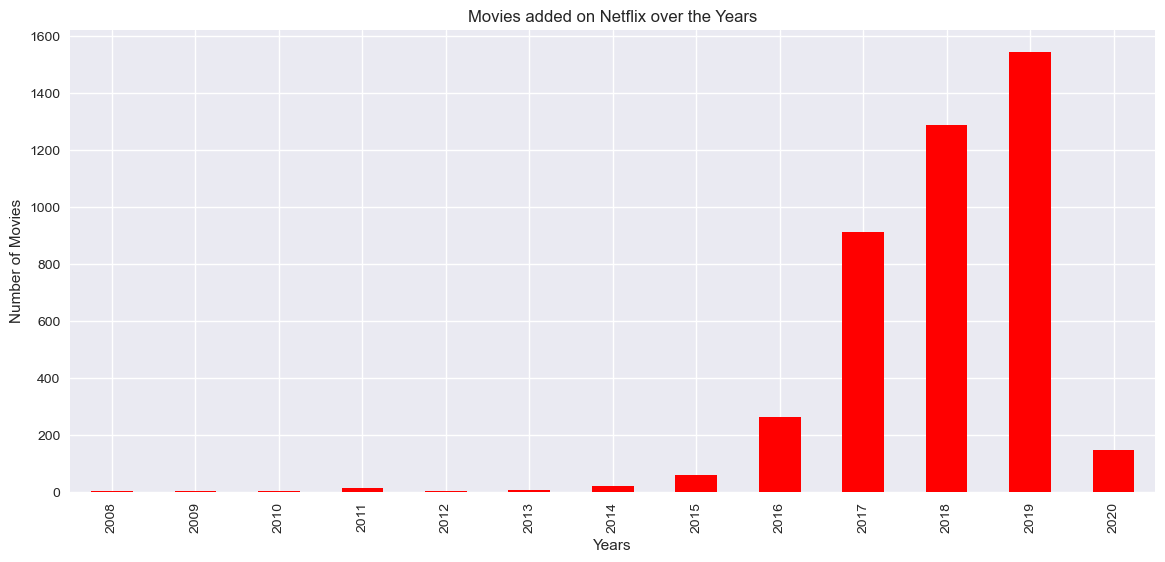

In [47]:

plt.figure(figsize=(14,6))
netflix_data_df[netflix_data_df["entertainment type"]=="Movie"]["year_added"].value_counts(sort=False).sort_index().plot(kind="bar",color="Red")
plt.title("Movies added on Netflix over the Years")
plt.xlabel("Years")
plt.ylabel("Number of Movies")

plt.show()

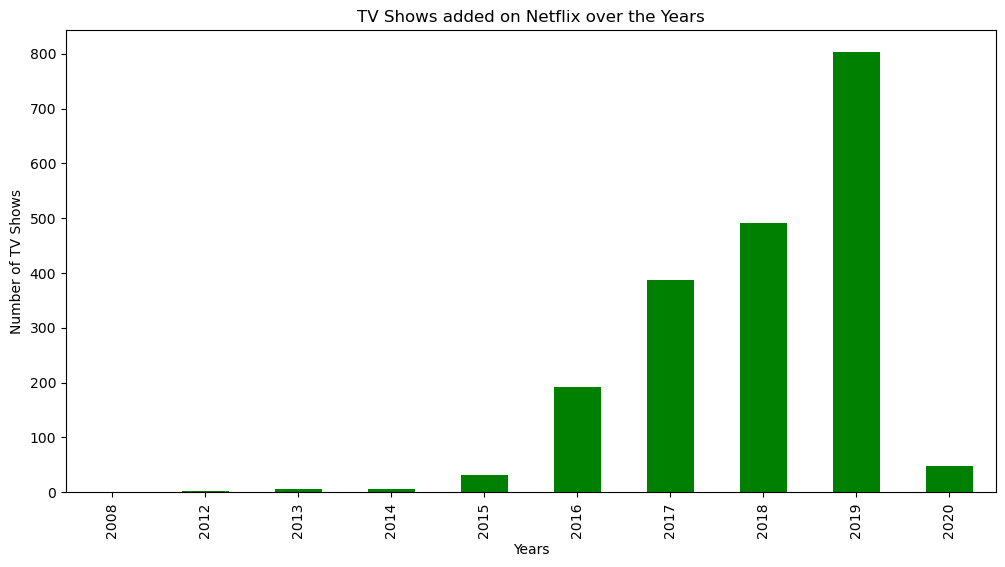

In [24]:
plt.figure(figsize=(12,6))
netflix_data_df[netflix_data_df["entertainment type"]=="TV Show"]["year_added"].value_counts(sort=False).sort_index().plot(kind="bar",color="Green")
plt.title("TV Shows added on Netflix over the Years")
plt.xlabel("Years")
plt.ylabel("Number of TV Shows")
plt.show()

## Analyzing Entertainment Types - Movies / TV Shows

In [25]:
netflix_type_count= netflix_data_df.groupby(["entertainment type"])["entertainment type"].count()
netflix_type_count


entertainment type
Movie      4265
TV Show    1969
Name: entertainment type, dtype: int64

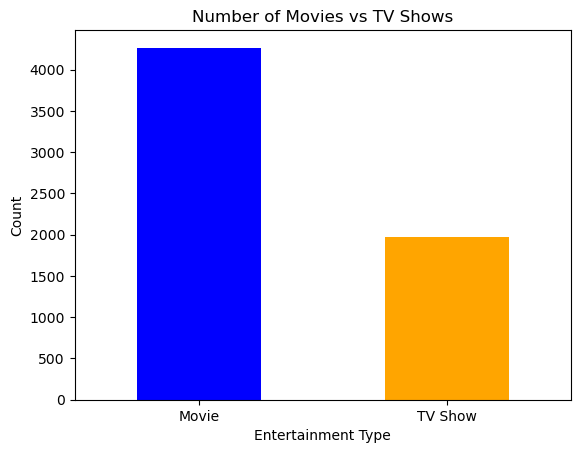

In [26]:
netflix_type_count.plot(x = "entertainment type", y = "entertainment type", kind = "bar", color=["blue", "orange"]) 
plt.title("Number of Movies vs TV Shows")
plt.xlabel("Entertainment Type")
plt.xticks(rotation="horizontal")
plt.ylabel("Count")
plt.show()



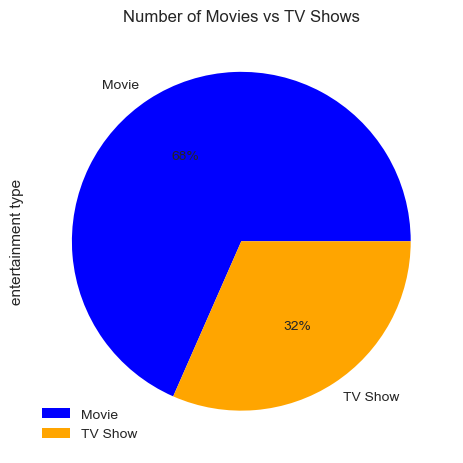

In [49]:
#2nd visual for entertainment type
netflix_type_count.plot.pie(autopct='%1.0f%%' , colors = ['blue', 'orange'],)

plt.title("Number of Movies vs TV Shows")
plt.legend()
plt.show()

### Observations on Data Types: 

### hh

## Analyzing Entertainment Type Based on Rating

[Text(0, 0, 'TV-PG'),
 Text(1, 0, 'TV-MA'),
 Text(2, 0, 'TV-Y7-FV'),
 Text(3, 0, 'TV-Y7'),
 Text(4, 0, 'TV-14'),
 Text(5, 0, 'R'),
 Text(6, 0, 'TV-Y'),
 Text(7, 0, 'NR'),
 Text(8, 0, 'PG-13'),
 Text(9, 0, 'TV-G'),
 Text(10, 0, 'PG'),
 Text(11, 0, 'G'),
 Text(12, 0, 'UR'),
 Text(13, 0, 'NC-17')]

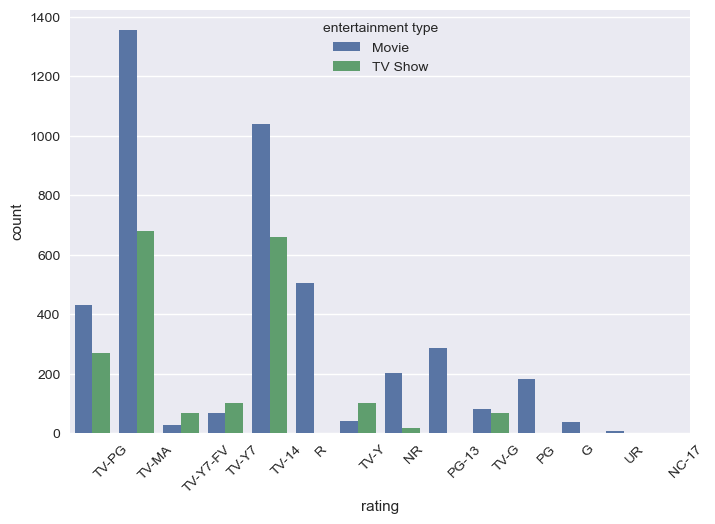

In [48]:
chart = sns.countplot(x='rating',data = netflix_data_df, hue="entertainment type")

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='left',
    fontweight='light'
)

## Analyzing Data Based on Year Released vs Year Added on Netflix

<AxesSubplot:xlabel='release_year', ylabel='year_added'>

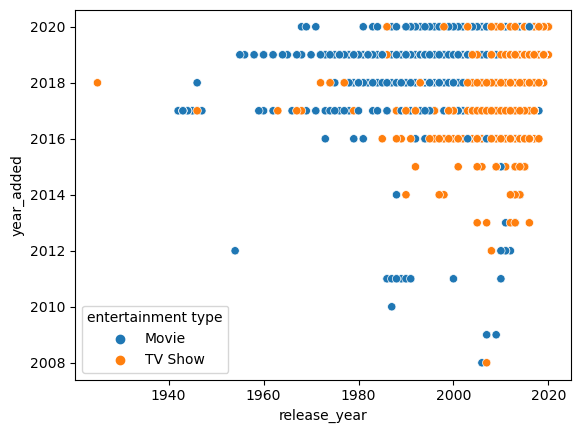

In [29]:

sns.scatterplot(data=netflix_data_df, x="release_year", y="year_added", hue=('entertainment type'))

<AxesSubplot:xlabel='year_added', ylabel='rating'>

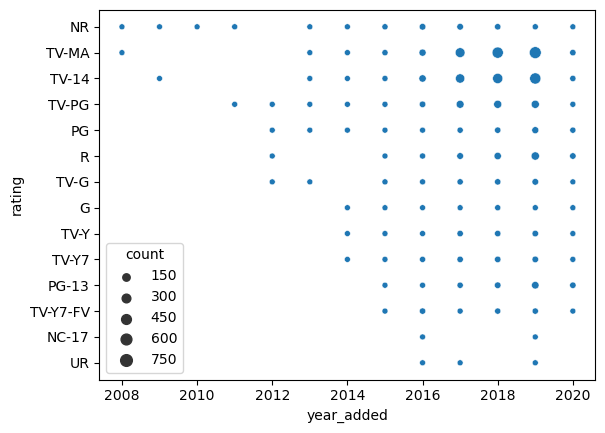

In [30]:
scatter_df = netflix_data_df.groupby(["year_added","rating"]).size().reset_index(name="count")
scatter_df

sns.scatterplot(data=scatter_df, x="year_added", y="rating", size="count")

In [31]:
release_year_df= netflix_data_df.groupby(["release_year"])["release_year"].count()
release_year_df

release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2016     830
2017     959
2018    1063
2019     843
2020      25
Name: release_year, Length: 72, dtype: int64

In [32]:
netflix_genre_count= netflix_data_df.groupby(["genre"])["genre"].count()
netflix_genre_count

genre
Action & Adventure                                              68
Action & Adventure, Anime Features, Children & Family Movies     1
Action & Adventure, Anime Features, Classic Movies               1
Action & Adventure, Anime Features, Horror Movies                1
Action & Adventure, Anime Features, International Movies        25
                                                                ..
TV Horror, TV Mysteries, Teen TV Shows                           1
TV Horror, Teen TV Shows                                         1
TV Sci-Fi & Fantasy, TV Thrillers                                1
TV Shows                                                        10
Thrillers                                                       40
Name: genre, Length: 461, dtype: int64

## Analyze the Top 10 Genres on Netflix

In [33]:
netflix_genre=netflix_data_df['genre'].value_counts().nlargest(10)
netflix_genre

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Kids' TV                                            159
Documentaries, International Movies                 150
Children & Family Movies, Comedies                  129
Children & Family Movies                            120
Comedies, International Movies                      120
Name: genre, dtype: int64

Text(0.5, 1.0, 'Top 10 Genres of Movies')

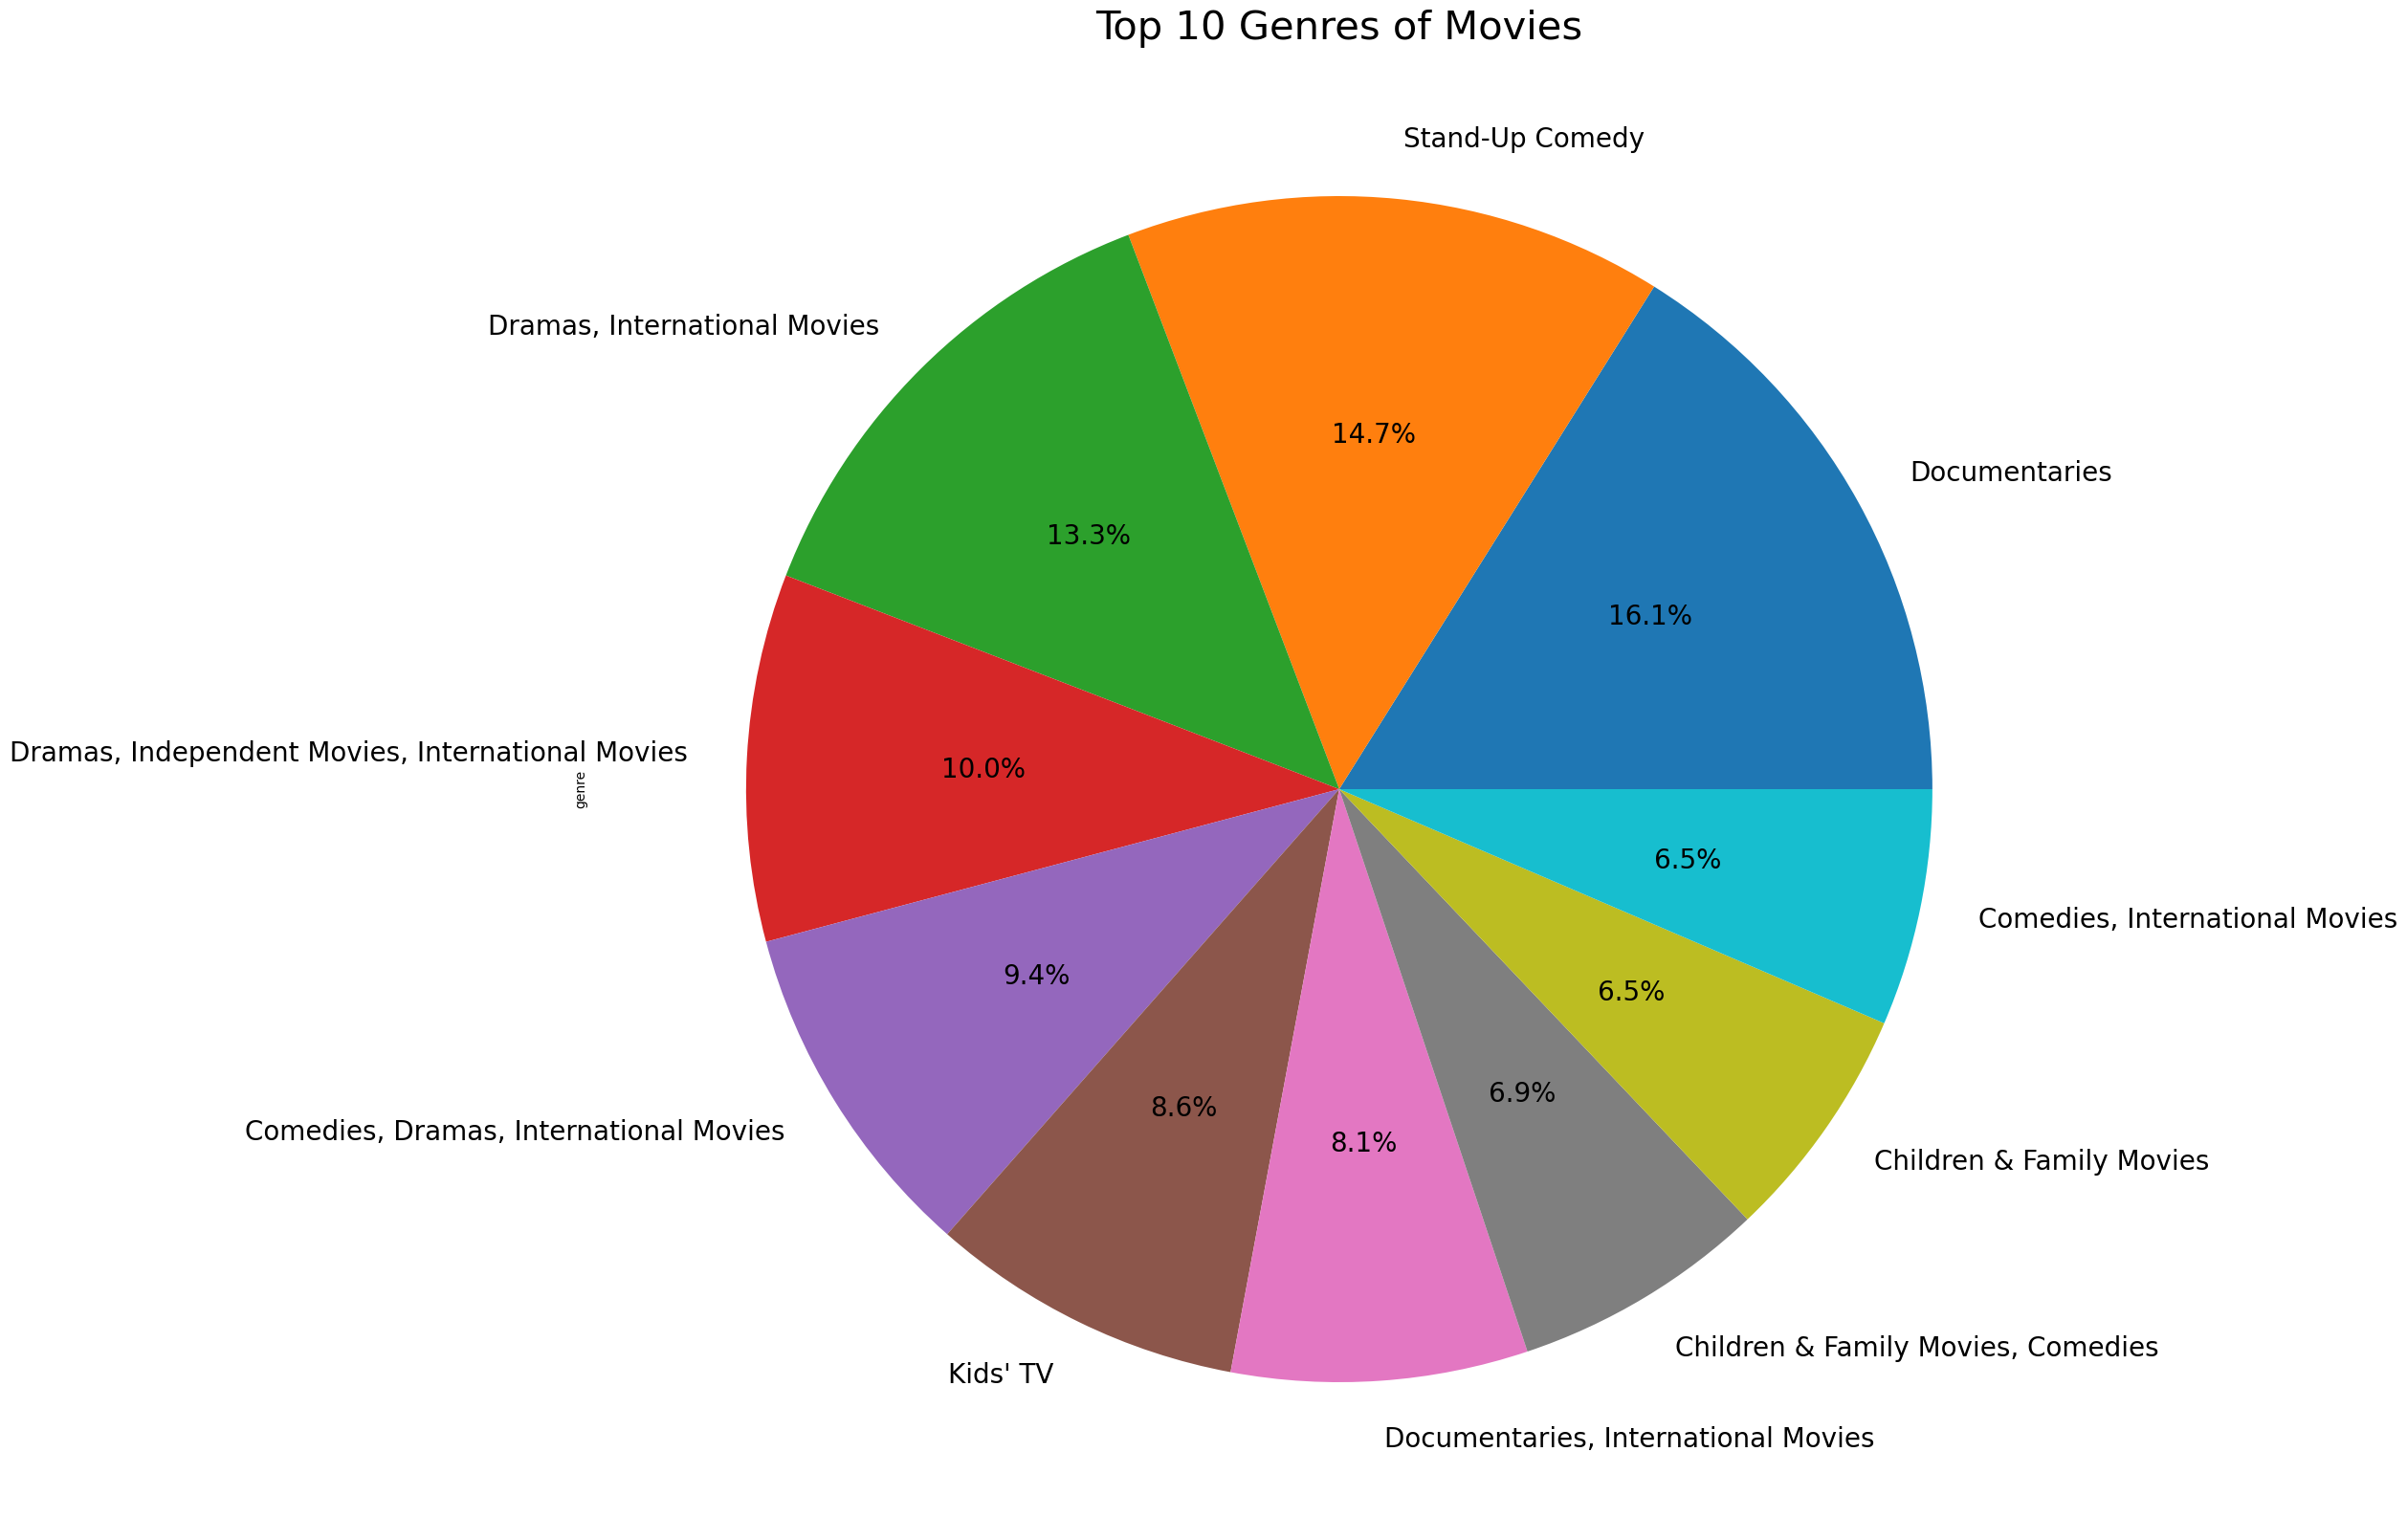

In [34]:
netflix_genre.plot.pie(autopct='%1.1f%%', figsize=(20, 35), textprops={'fontsize': 20})
plt.title("Top 10 Genres of Movies", size=30)

## Analyze Netflix Content Growth Over The Years

In [35]:
year_data = netflix_data_df['year_added'].value_counts().sort_index()
year_data

2008       2
2009       2
2010       1
2011      13
2012       7
2013      12
2014      25
2015      90
2016     456
2017    1300
2018    1782
2019    2349
2020     195
Name: year_added, dtype: int64

In [36]:
type_data = netflix_data_df.groupby('year_added')['entertainment type'].value_counts().unstack().fillna(0)
type_data

entertainment type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,4.0,3.0
2013,6.0,6.0
2014,19.0,6.0
2015,58.0,32.0
2016,264.0,192.0


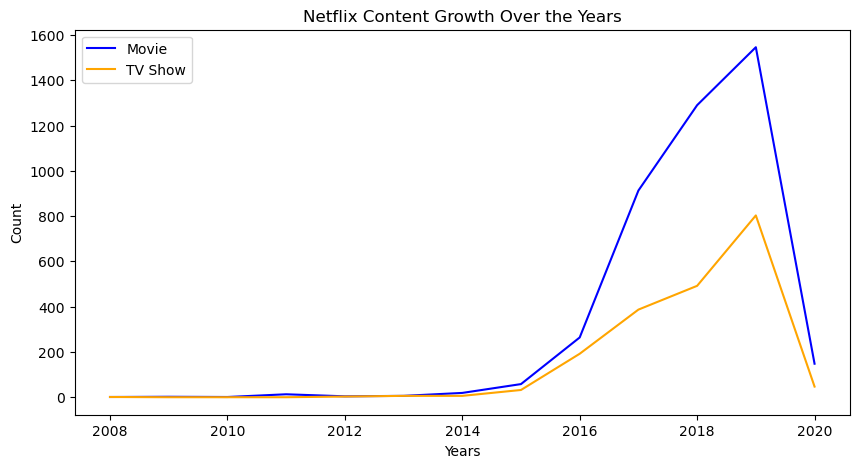

In [37]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(type_data['Movie'], color='blue', label='Movie')
ax.plot(type_data['TV Show'], color='orange', label='TV Show')
plt.legend(loc="upper left")
plt.title('Netflix Content Growth Over the Years')
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

In [50]:
netflix_df_movies_only = netflix_data_df[netflix_data_df["entertainment type"] == "Movie"]

<AxesSubplot:xlabel='year_added', ylabel='count'>

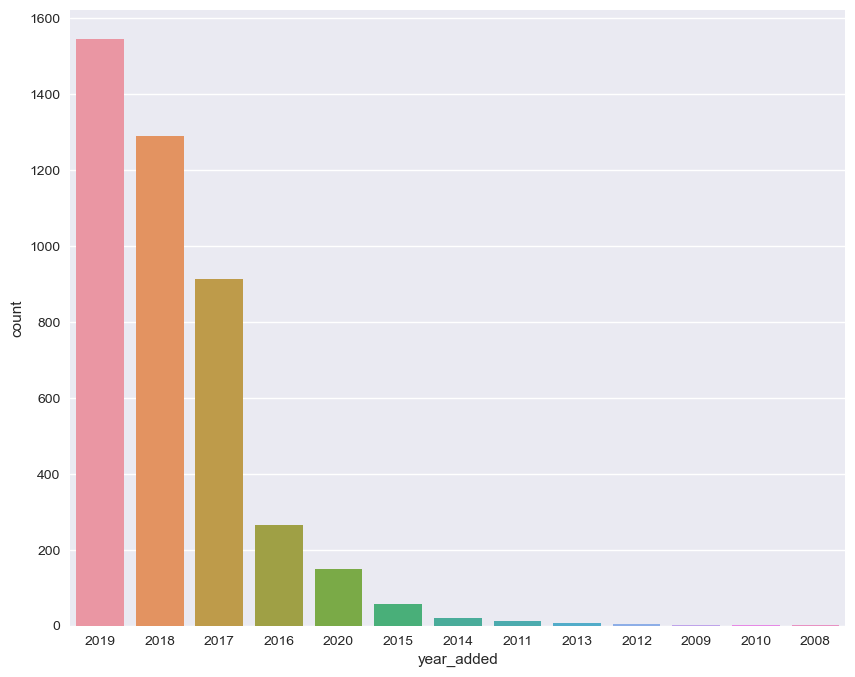

In [51]:
plt.figure(figsize=(10,8))
sns.countplot(x="year_added",data=netflix_df_movies_only, order = netflix_df_movies_only['year_added'].value_counts().index[0:14])

In [40]:
netflix_df_shows_only = netflix_data_df[netflix_data_df["entertainment type"] == "TV Show"]

<AxesSubplot:xlabel='year_added', ylabel='count'>

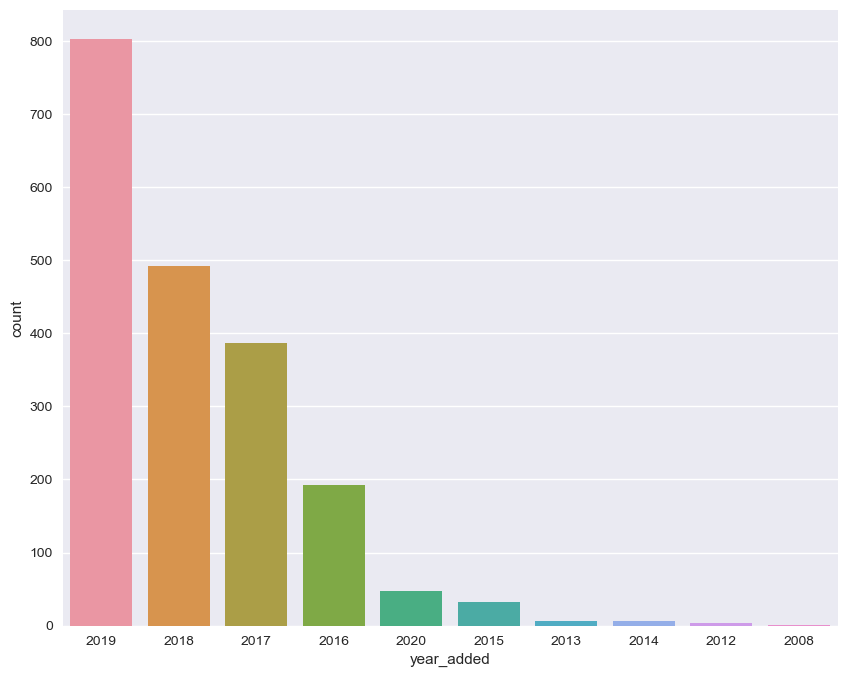

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(x="year_added",data=netflix_df_shows_only, order = netflix_df_shows_only['year_added'].value_counts().index[0:14])

In [42]:
netflix_data_df.info
netflix_data_df.nunique


most_titles_produced = netflix_data_df.groupby('country').count().sort_values('title',ascending=False).head(10)

most_titles_produced.reset_index(inplace=True)
most_titles_produced


,country,show_id,entertainment type,title,release_year,rating,duration,genre,year_added,imdb_rating
0,United States,2508,2508,2508,2508,2508,2508,2508,2508,338
1,India,777,777,777,777,777,777,777,777,108
2,United Kingdom,348,348,348,348,348,348,348,348,40
3,Japan,176,176,176,176,176,176,176,176,21
4,Canada,141,141,141,141,141,141,141,141,10
5,South Korea,136,136,136,136,136,136,136,136,20
6,Spain,117,117,117,117,117,117,117,117,10
7,France,90,90,90,90,90,90,90,90,10
8,Mexico,83,83,83,83,83,83,83,83,8
9,Turkey,79,79,79,79,79,79,79,79,9


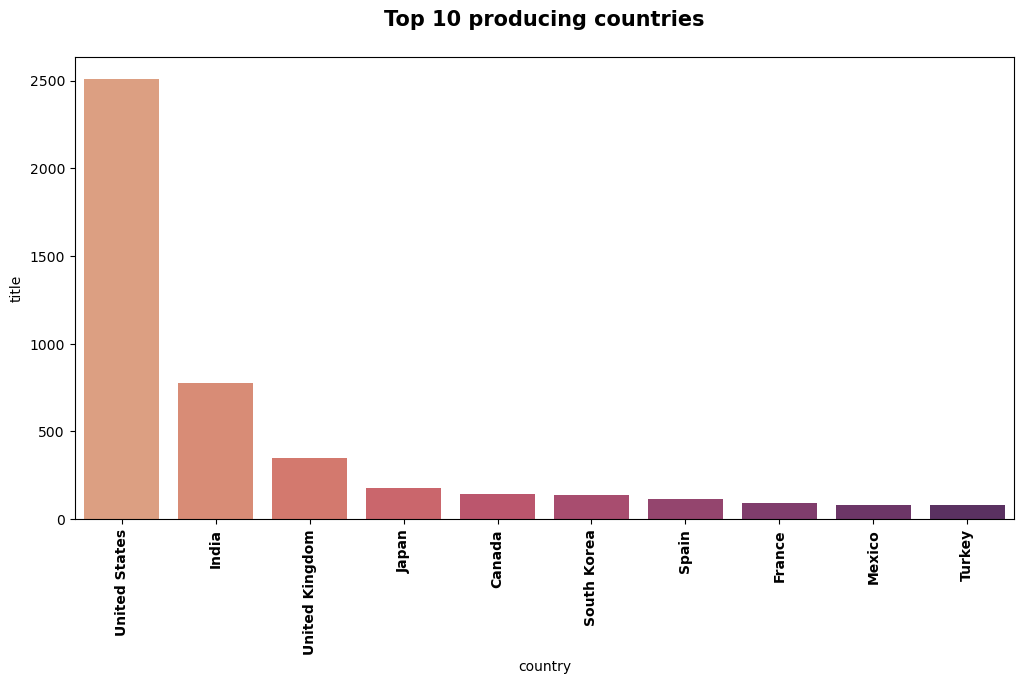

In [43]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])

sns.barplot(x=most_titles_produced.country, y=most_titles_produced.title, data=most_titles_produced, palette="flare")
#hue colors: Movies and TV

ax.set_xticklabels(most_titles_produced.country, fontweight='bold', rotation='90')
ax.set_title('Top 10 producing countries\n', fontsize=15, fontweight='bold');


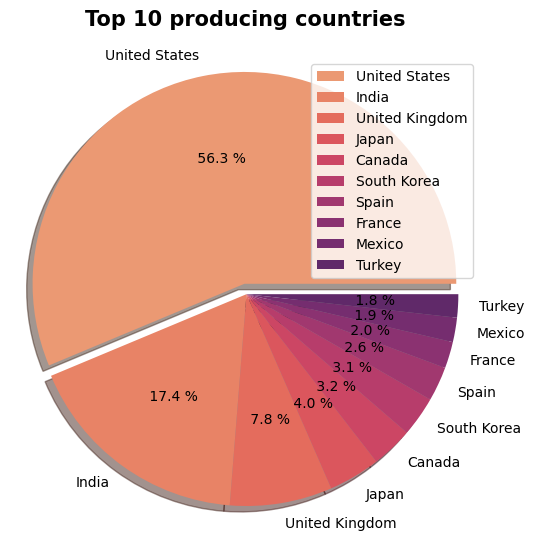

In [44]:
fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

explode = [0 for _ in range(10)]
explode[0] = 0.05

ax2 = plt.subplot(gs[1])

labels = most_titles_produced.country
sizes = most_titles_produced.title 

ax2.pie(sizes, labels=labels, shadow=True, startangle=0, autopct ='% 1.1f %%', explode=explode, colors=sns.color_palette("flare", n_colors=10))
ax2.axis('equal')

ax2.set_title('Top 10 producing countries\n', fontsize=15, fontweight='bold')
plt.legend(labels, loc=0);

Text(0.5, 1.0, 'Key Words in Movie Titles\n')

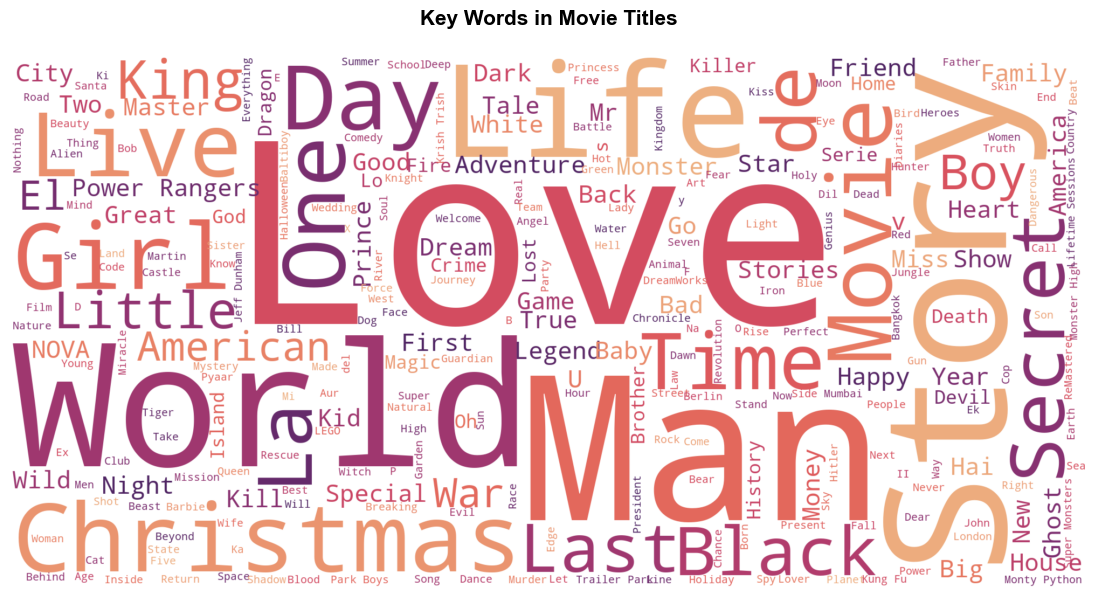

In [45]:
#use wordcloud to represent text data in which the size of each word indicates its frequency or importance.

plt.style.use('seaborn')

from PIL import Image

words = netflix_data_df["title"].str.split("(").str[0].value_counts().keys()

word_cloud = WordCloud(stopwords=STOPWORDS,scale=5,max_words=1000,colormap="flare",background_color="white").generate(" ".join(words))

plt.figure(figsize=(15,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Movie Titles\n",color='black',fontsize=15, fontweight='bold')


In [82]:
netflix_data_df[netflix_data_df.type == 'Movie'].duration.head()

0     90 min
1     94 min
4     99 min
6    110 min
7     60 min
Name: duration, dtype: object

In [83]:
def to_minutes (series):
    return series.split()[0]
    
        
netflix_data_df['duration'] = netflix_data_df.duration.apply(lambda x: to_minutes(x))

netflix_data_df[netflix_data_df.type == 'Movie'].duration.head()


0     90
1     94
4     99
6    110
7     60
Name: duration, dtype: object

In [84]:
netflix_data_df['duration'] = netflix_data_df.duration.astype('int')

In [88]:
netflix_data_df[netflix_data_df.type == 'Movie'].duration.mean()

#The average duration for all movies released on Netflix is ~ 99 minutes.

99.10082063305978

In [86]:
duration_by_year = netflix_data_df[netflix_data_df.type == 'Movie'][['duration', 'release_year']]
duration_by_year

,duration,release_year
0,90,2019
1,94,2016
4,99,2017
6,110,2014
7,60,2017
...,...,...
5577,70,2007
5578,102,2015
5579,88,2014
5580,109,2015


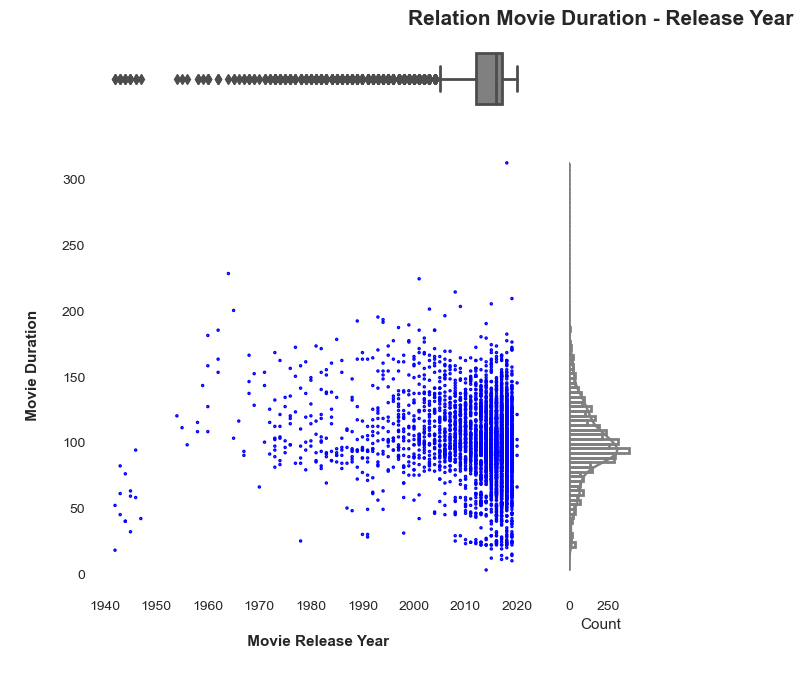

In [87]:
sns.set_style(style='white')

g = sns.JointGrid(marginal_ticks=True, space=0.5, palette='flare')
x, y = duration_by_year.release_year, duration_by_year.duration
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=1, linewidth=1.5, ax=g.ax_joint) #marginal_ticks=True)
sns.histplot(y=y, fill=False, linewidth=2, ax=g.ax_marg_y, kde=True, color = 'grey')
sns.boxplot(x=x, linewidth=2, ax=g.ax_marg_x, color='grey')

g.ax_joint.set_xlabel('\n Movie Release Year\n', fontweight='bold')
g.ax_joint.set_ylabel('\n Movie Duration\n', fontweight='bold')

g.ax_marg_x.get_yticklabels()
g.ax_marg_y.get_xticklabels()

plt.title('Relation Movie Duration - Release Year\n\n\n\n\n', fontsize=15, fontweight='bold');